# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv').head(5000)
resource_data = pd.read_csv('resources.csv')

In [3]:
#project_data_1=project_data[project_data['project_is_approved']==1]
#project_data_0=project_data[project_data['project_is_approved']==0]
#
#print(project_data_1.shape)
#print(project_data_0.shape)
#
##Creating a dataset of 0.2k points containg points from both the classes
#project_data = project_data_1[0:33458].append(project_data_0[0:16542])
#print(project_data['project_is_approved'].value_counts())
#print(project_data.shape)

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (5000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]
#print(cols)
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date']=pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime',axis=1,inplace=True)
project_data.sort_values(by=['Date'],inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
2521      164738  p248458  40da977f63fb3d85589a063471304b11            Ms.   

     school_state                Date project_grade_category  \
473            GA 2016-04-27 00:53:00          Grades PreK-2   
2521           NJ 2016-04-27 09:33:03          Grades PreK-2   

     project_subject_categories   project_subject_subcategories  \
473            Applied Learning               Early Development   
2521        Literacy & Language  Literacy, Literature & Writing   

                                    project_title  \
473        Flexible Seating for Flexible Learning   
2521  Supplies to Support my Struggling Readers!!   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
2521  My students are all struggling readers. I supp...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
2521  My students live in a lower income area in Cen...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
2521  The materials I am requesting will be used dur...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
2521  Imagine not being able to read the text you ar...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
2521  My students need phonics and reading comprehen...   

      teacher_number_of_previously_posted_projects  project_is_approved  
473                                              2                    1  
2521                                            27                    0

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)
#project_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
2521      164738  p248458  40da977f63fb3d85589a063471304b11            Ms.   

     school_state                Date project_grade_category  \
473            GA 2016-04-27 00:53:00          Grades PreK-2   
2521           NJ 2016-04-27 09:33:03          Grades PreK-2   

                                    project_title  \
473        Flexible Seating for Flexible Learning   
2521  Supplies to Support my Struggling Readers!!   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
2521  My students are all struggling readers. I supp...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
2521  My students live in a lower income area in Cen...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
2521  The materials I am requesting will be used dur...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
2521  Imagine not being able to read the text you ar...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
2521  My students need phonics and reading comprehen...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
473                                              2                    1   
2521                                            27                    0   

       clean_categories          clean_subcategories  \
473     AppliedLearning             EarlyDevelopment   
2521  Literacy_Language  Literacy Literature_Writing   

                                                  essay  
473   I recently read an article about giving studen...  
2521  My students are all struggling readers. I supp...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
#print(project_data['essay'].values[20000])
#print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

Sing, Say, Dance, and Play! Every day an exciting adventure awaits my students when they enter my music classroom, a.k.a. Ms. K. is House of Music. We sing, say, dance, and play to experience music at its fullest!\r\n\r\nI teach music to grades K-6 in a low-income public school in Ferguson, Missouri.\r\nMost are at poverty level, and many also experience violence in their neighborhoods on a daily basis. Sometimes music is the only solace to their day. In spite of their tumultuous lives outside of school, my students are eager to express themselves through music. Every day they enter the music room with excitement and an eagerness to learn!Our school is focusing on environmental science this year. Every other Friday the entire school does environmental science lessons and experiments. I would like to take my class of young scientists on virtual field trips to explore our environment. The Google Cardboard headsets and ASUS phones will open a brand new world for my students to explore env

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Sing, Say, Dance, and Play! Every day an exciting adventure awaits my students when they enter my music classroom, a.k.a. Ms. K. is House of Music. We sing, say, dance, and play to experience music at its fullest!    I teach music to grades K-6 in a low-income public school in Ferguson, Missouri.  Most are at poverty level, and many also experience violence in their neighborhoods on a daily basis. Sometimes music is the only solace to their day. In spite of their tumultuous lives outside of school, my students are eager to express themselves through music. Every day they enter the music room with excitement and an eagerness to learn!Our school is focusing on environmental science this year. Every other Friday the entire school does environmental science lessons and experiments. I would like to take my class of young scientists on virtual field trips to explore our environment. The Google Cardboard headsets and ASUS phones will open a brand new world for my students to explore environme

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Sing Say Dance and Play Every day an exciting adventure awaits my students when they enter my music classroom a k a Ms K is House of Music We sing say dance and play to experience music at its fullest I teach music to grades K 6 in a low income public school in Ferguson Missouri Most are at poverty level and many also experience violence in their neighborhoods on a daily basis Sometimes music is the only solace to their day In spite of their tumultuous lives outside of school my students are eager to express themselves through music Every day they enter the music room with excitement and an eagerness to learn Our school is focusing on environmental science this year Every other Friday the entire school does environmental science lessons and experiments I would like to take my class of young scientists on virtual field trips to explore our environment The Google Cardboard headsets and ASUS phones will open a brand new world for my students to explore environmental science in new and exc

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1211.18it/s]


In [19]:
# after preprocesing
preprocessed_essays[2000]

'sing say dance play every day exciting adventure awaits students enter music classroom k ms k house music we sing say dance play experience music fullest i teach music grades k 6 low income public school ferguson missouri most poverty level many also experience violence neighborhoods daily basis sometimes music solace day in spite tumultuous lives outside school students eager express music every day enter music room excitement eagerness learn our school focusing environmental science year every friday entire school environmental science lessons experiments i would like take class young scientists virtual field trips explore environment the google cardboard headsets asus phones open brand new world students explore environmental science new exciting ways imagine not discussing ocean pollution also going seeing brainstorming solutions or taking virtual field trip wildlife conservation society learning wildlife conservation the possibilities endless by donating project allowing students

In [20]:
#adding a new column for the processed essay text
project_data['clean_essay']=preprocessed_essays
print(project_data.columns)

# after preprocesing
preprocessed_essays[2000]

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay'],
      dtype='object')


'sing say dance play every day exciting adventure awaits students enter music classroom k ms k house music we sing say dance play experience music fullest i teach music grades k 6 low income public school ferguson missouri most poverty level many also experience violence neighborhoods daily basis sometimes music solace day in spite tumultuous lives outside school students eager express music every day enter music room excitement eagerness learn our school focusing environmental science year every friday entire school environmental science lessons experiments i would like take class young scientists virtual field trips explore environment the google cardboard headsets asus phones open brand new world students explore environmental science new exciting ways imagine not discussing ocean pollution also going seeing brainstorming solutions or taking virtual field trip wildlife conservation society learning wildlife conservation the possibilities endless by donating project allowing students

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# similarly you can preprocess the titles also
# The above random records show that there are no URLs or HTML tags, but we will remove incase if there are any

from tqdm import tqdm #for status bar
from bs4 import BeautifulSoup #for html tags

preprocessed_title=[]

for title in tqdm(project_data['project_title'].values):
    # To remove urls - https://stackoverflow.com/a/40823105/4084039
    title = re.sub(r"http\S+", "", title)
    
    # To remove all HTML tags
    #https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
    title = BeautifulSoup(title, 'lxml').get_text()
    
    # To split contractions - refer decontracted function defined above
    title = decontracted(title)
    
    # To remove alphanumerics (words with numbers in them) - https://stackoverflow.com/a/18082370/4084039
    title = re.sub("\S*\d\S*", "", title).strip()
    
    # To remove special characters - https://stackoverflow.com/a/5843547/4084039
    title = re.sub('[^A-Za-z]+', ' ', title)
    
    # To remove stop words from the summaries and convert to lowercase
    title = ' '.join(e.lower() for e in title.split() if e.lower() not in stopwords)
    preprocessed_title.append(title.strip())

#adding a new column for cleaned titles
project_data['clean_title']=preprocessed_title
print(project_data.columns)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 2633.03it/s]


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title'],
      dtype='object')


In [22]:
#replacing Nan values with 'Unknown'
project_data['teacher_prefix']=project_data['teacher_prefix'].replace(np.nan,'Unknown')

# Combining resource_data with project_data

In [23]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

# Adding word counts for Title and Essay

In [24]:
#https://stackoverflow.com/questions/54397096/how-to-do-word-count-on-pandas-dataframe

project_data['title_wc'] = project_data['clean_title'].str.count(' ')+1

project_data['essay_wc'] = project_data['clean_essay'].str.count(' ')+1

project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc'],
      dtype='object')

# Adding sentiment scores for each essay

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
compound = []

for sentance in tqdm(project_data['clean_essay']):
    score_neg = senti_analyzer.polarity_scores(sentance)['neg']
    score_pos = senti_analyzer.polarity_scores(sentance)['pos']
    score_neu = senti_analyzer.polarity_scores(sentance)['neu']
    score_comp = senti_analyzer.polarity_scores(sentance)['compound']
    neg.append(score_neg)
    pos.append(score_pos)
    neu.append(score_neu)
    compound.append(score_comp)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SACHEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\SACHEEN\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:56<00:00, 89.15it/s]


In [26]:
project_data['pos'] = pos
project_data['neg'] = neg
project_data['neu'] = neu
project_data['compound'] = compound

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc', 'pos',
       'neg', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [28]:
## we use count vectorizer to convert the values into one 
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
#print(vectorizer.get_feature_names())
#print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [29]:
## we use count vectorizer to convert the values into one 
#vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
#sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
#print(vectorizer.get_feature_names())
#print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [30]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [31]:
## We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10)
#text_bow = vectorizer.fit_transform(preprocessed_essays)
#print("Shape of matrix after one hot encodig ",text_bow.shape)

In [32]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [33]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10)
#text_tfidf = vectorizer.fit_transform(preprocessed_essays)
#print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [34]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [35]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [36]:
## average Word2Vec
## compute average word2vec for each review.
#avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
#for sentence in tqdm(preprocessed_essays): # for each review/sentence
#    vector = np.zeros(300) # as word vectors are of zero length
#    cnt_words =0; # num of words with a valid vector in the sentence/review
#    for word in sentence.split(): # for each word in a review/sentence
#        if word in glove_words:
#            vector += model[word]
#            cnt_words += 1
#    if cnt_words != 0:
#        vector /= cnt_words
#    avg_w2v_vectors.append(vector)
#
#print(len(avg_w2v_vectors))
#print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [37]:
## S = ["abc def pqr", "def def def abc", "pqr pqr def"]
#tfidf_model = TfidfVectorizer()
#tfidf_model.fit(preprocessed_essays)
## we are converting a dictionary with word as a key, and the idf as a value
#dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
#tfidf_words = set(tfidf_model.get_feature_names())

In [38]:
## average Word2Vec
## compute average word2vec for each review.
#tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
#for sentence in tqdm(preprocessed_essays): # for each review/sentence
#    vector = np.zeros(300) # as word vectors are of zero length
#    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#    for word in sentence.split(): # for each word in a review/sentence
#        if (word in glove_words) and (word in tfidf_words):
#            vec = model[word] # getting the vector for each word
#            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#            vector += (vec * tf_idf) # calculating tfidf weighted w2v
#            tf_idf_weight += tf_idf
#    if tf_idf_weight != 0:
#        vector /= tf_idf_weight
#    tfidf_w2v_vectors.append(vector)
#
#print(len(tfidf_w2v_vectors))
#print(len(tfidf_w2v_vectors[0]))

In [39]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [40]:
#price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#project_data = pd.merge(project_data, price_data, on='id', how='left')

In [41]:
## check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
## standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#from sklearn.preprocessing import StandardScaler
#
## price_standardized = standardScalar.fit(project_data['price'].values)
## this will rise the error
## ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
## Reshape your data either using array.reshape(-1, 1)
#
#price_scalar = StandardScaler()
#price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
#
## Now standardize the data with above maen and variance.
#price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [42]:
#price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [43]:
#print(categories_one_hot.shape)
#print(sub_categories_one_hot.shape)
#print(text_bow.shape)
#print(price_standardized.shape)

In [44]:
## merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#from scipy.sparse import hstack
## with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
#X.shape

In [45]:
## please write all the code with proper documentation, and proper titles for each subsection
## when you plot any graph make sure you use 
#    # a. Title, that describes your plot, this will be very helpful to the reader
#    # b. Legends if needed
#    # c. X-axis label
#    # d. Y-axis label

__ Computing Sentiment Scores__

In [46]:
#import nltk
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#
## import nltk
## nltk.download('vader_lexicon')
#
#sid = SentimentIntensityAnalyzer()
#
#for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
#for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
#of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
#for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
#learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
#in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
#mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
#montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
#in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
#and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
#food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
#of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
#nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
#and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
#shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
#nannan'
#ss = sid.polarity_scores(for_sentiment)
#
#for k in ss:
#    print('{0}: {1}, '.format(k, ss[k]), end='')
#
## we can use these 4 things as features/attributes (neg, neu, pos, compound)
## neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Checking if there are any values other than 0 and 1
project_data['project_is_approved'].unique()

#https://answers.dataiku.com/2352/split-dataset-by-stratified-sampling
df_train, df_test = train_test_split(project_data, test_size = 0.3, stratify=project_data['project_is_approved'])
print(df_train.shape,df_test.shape)

(3500, 28) (1500, 28)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### 2.2.1 Vectorizing Categorical data using class probabilities (Response Coding)

In [48]:
print(df_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc', 'pos',
       'neg', 'neu', 'compound'],
      dtype='object')


#### 2.2.1.1 Feature encoding for categories

In [49]:
#https://stackoverflow.com/questions/3839729/count-unique-values-with-pandas-per-groups

# Fetching unique value counts for each class
clean_cat_count = pd.DataFrame()
clean_cat_count[1] = df_train['clean_categories'].where(df_train['project_is_approved']==1).value_counts()
clean_cat_count[0] = df_train['clean_categories'].where(df_train['project_is_approved']==0).value_counts()

#Replacing nan value counts with zeros
clean_cat_count[1] = clean_cat_count[1].replace(np.nan,0)
clean_cat_count[0] = clean_cat_count[0].replace(np.nan,0)

#print(clean_cat_count)

In [50]:
#Calculating probs for each class
print(clean_cat_count)
for i in clean_cat_count.iterrows():
      print(i)

                                        1      0
Literacy_Language                     633  113.0
Math_Science                          454   93.0
Literacy_Language Math_Science        424   62.0
Health_Sports                         299   47.0
Music_Arts                            135   24.0
Literacy_Language SpecialNeeds        131   22.0
SpecialNeeds                          102   20.0
AppliedLearning                        84   28.0
Math_Science Literacy_Language         67    6.0
AppliedLearning Literacy_Language      66    5.0
Literacy_Language Music_Arts           50    6.0
AppliedLearning SpecialNeeds           48    8.0
Math_Science SpecialNeeds              46   12.0
History_Civics Literacy_Language       44    2.0
Math_Science Music_Arts                43   14.0
Health_Sports SpecialNeeds             36    5.0
Warmth Care_Hunger                     32    3.0
History_Civics                         31    9.0
Literacy_Language History_Civics       29    3.0
Math_Science Applied

In [51]:
for i in clean_cat_count.iterrows():
    clean_cat_count['1_prob'] = clean_cat_count[1]/(clean_cat_count[1]+clean_cat_count[0])
    clean_cat_count['0_prob'] = clean_cat_count[0]/(clean_cat_count[1]+clean_cat_count[0])

In [52]:
#print(clean_cat_count)
#appending prob values to train data in a new column
for idx,j in clean_cat_count.iterrows():
    for indx,i in df_train.iterrows():
        if idx == df_train.at[indx,'clean_categories']:
            df_train.at[indx, 'cat_1'] = clean_cat_count.at[idx, '1_prob']
            df_train.at[indx, 'cat_0'] = clean_cat_count.at[idx, '0_prob']
print(df_train.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1075        6842  p069251  bf40db50c3c898abe7a49d792b067c74            Ms.   
1988      171843  p191326  957af6c79f0ed3faf32c44b994b66172           Mrs.   

     school_state                Date project_grade_category  \
1075           AK 2016-08-05 17:14:37             Grades 6-8   
1988           CT 2016-09-03 16:40:23          Grades PreK-2   

                          project_title  \
1075  Middle School Supplies and Smiles   
1988          iPad for ourPad (Room 16)   

                                        project_essay_1  \
1075  I have a group of amazing, unique, and creativ...   
1988  I am a 2nd grade teacher in Meriden, CT with a...   

                                        project_essay_2    ...      price  \
1075  Living in a small-secluded town makes it hard ...    ...     444.28   
1988  As a teacher, I LOVE when my students take own...    ...     513.25   

     quantity title_wc  essay_wc

In [53]:
df_train.isna().any()

Unnamed: 0                                      False
id                                              False
teacher_id                                      False
teacher_prefix                                  False
school_state                                    False
Date                                            False
project_grade_category                          False
project_title                                   False
project_essay_1                                 False
project_essay_2                                 False
project_essay_3                                  True
project_essay_4                                  True
project_resource_summary                        False
teacher_number_of_previously_posted_projects    False
project_is_approved                             False
clean_categories                                False
clean_subcategories                             False
essay                                           False
clean_essay                 

In [54]:
#appending prob values to test data in a new column. Incase the class is not part of the train data, a prob of 0.5 is assigned
for idx,j in clean_cat_count.iterrows():
    for indx,i in df_test.iterrows():
        if idx == df_test.at[indx, 'clean_categories']:
            df_test.at[indx, 'cat_1'] = clean_cat_count.at[idx, '1_prob']
            df_test.at[indx, 'cat_0'] = clean_cat_count.at[idx, '0_prob']

df_test['cat_1']=df_test['cat_0'].replace(np.nan,0.5)
df_test['cat_0']=df_test['cat_0'].replace(np.nan,0.5)

print(df_test.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1772       40417  p118661  f2535d6a38ea8bcf8c6d4320872c0f3f           Mrs.   
3211       96518  p156983  94a73c946105d3d220176c6c4d4b056c           Mrs.   

     school_state                Date project_grade_category  \
1772           NC 2016-08-29 12:09:31             Grades 6-8   
3211           CA 2016-11-25 04:03:15          Grades PreK-2   

                                          project_title  \
1772  Media Center Makeover: Bringing the School Lib...   
3211                         The Fourth R??  RECESS!!!!   

                                        project_essay_1  \
1772  We are a 6-8 middle school in a quickly growin...   
3211  My students, who are 5- and 6-year-olds, come ...   

                                        project_essay_2    ...      price  \
1772  My students need seating in the library that w...    ...     267.98   
3211  My Kindergarten student's attention span, memo...    ...

In [55]:
df_train['cat_1']=df_train['cat_1'].replace(np.nan,0.5)
df_train['cat_0']=df_train['cat_0'].replace(np.nan,0.5)

##### 2.2.1.2 Feature encoding for subcategories

In [56]:
#https://stackoverflow.com/questions/3839729/count-unique-values-with-pandas-per-groups

# Fetching unique value counts for each class
clean_subcat_count = pd.DataFrame()
clean_subcat_count[1] = df_train['clean_subcategories'].where(df_train['project_is_approved']==1).value_counts()
clean_subcat_count[0] = df_train['clean_subcategories'].where(df_train['project_is_approved']==0).value_counts()

#Replacing nan value counts with zeros
clean_subcat_count[1]=clean_subcat_count[1].replace(np.nan,0)
clean_subcat_count[0]=clean_subcat_count[0].replace(np.nan,0)

#print(clean_subcat_count)

#Calculating probs for each class
for i in clean_subcat_count.iterrows():
    clean_subcat_count['1_prob'] = clean_subcat_count[1]/(clean_subcat_count[1]+clean_subcat_count[0])
    clean_subcat_count['0_prob'] = clean_subcat_count[0]/(clean_subcat_count[1]+clean_subcat_count[0])

#print(clean_subcat_count)

#appending prob values to train data in a new column
  
for idx,j in clean_subcat_count.iterrows():
    for indx,i in df_train.iterrows():
        if idx == df_train.at[indx, 'clean_subcategories']:
            df_train.at[indx, 'subcat_1'] = clean_subcat_count.at[idx, '1_prob']
            df_train.at[indx, 'subcat_0'] = clean_subcat_count.at[idx, '0_prob']

print(df_test.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1772       40417  p118661  f2535d6a38ea8bcf8c6d4320872c0f3f           Mrs.   
3211       96518  p156983  94a73c946105d3d220176c6c4d4b056c           Mrs.   

     school_state                Date project_grade_category  \
1772           NC 2016-08-29 12:09:31             Grades 6-8   
3211           CA 2016-11-25 04:03:15          Grades PreK-2   

                                          project_title  \
1772  Media Center Makeover: Bringing the School Lib...   
3211                         The Fourth R??  RECESS!!!!   

                                        project_essay_1  \
1772  We are a 6-8 middle school in a quickly growin...   
3211  My students, who are 5- and 6-year-olds, come ...   

                                        project_essay_2    ...      price  \
1772  My students need seating in the library that w...    ...     267.98   
3211  My Kindergarten student's attention span, memo...    ...

In [57]:
#appending prob values to test data in a new column. Incase the class is not part of the train data, a prob of 0.5 is assigned
for idx,j in clean_subcat_count.iterrows():
    for indx,i in df_test.iterrows():
        if idx == df_test.at[indx, 'clean_subcategories']:
            df_test.at[indx, 'subcat_1'] = clean_subcat_count.at[idx, '1_prob']
            df_test.at[indx, 'subcat_0'] = clean_subcat_count.at[idx, '0_prob']
                                                                               
df_test['subcat_1']=df_test['subcat_1'].replace(np.nan,0.5)
df_test['subcat_0']=df_test['subcat_0'].replace(np.nan,0.5)

print(df_test.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1772       40417  p118661  f2535d6a38ea8bcf8c6d4320872c0f3f           Mrs.   
3211       96518  p156983  94a73c946105d3d220176c6c4d4b056c           Mrs.   

     school_state                Date project_grade_category  \
1772           NC 2016-08-29 12:09:31             Grades 6-8   
3211           CA 2016-11-25 04:03:15          Grades PreK-2   

                                          project_title  \
1772  Media Center Makeover: Bringing the School Lib...   
3211                         The Fourth R??  RECESS!!!!   

                                        project_essay_1  \
1772  We are a 6-8 middle school in a quickly growin...   
3211  My students, who are 5- and 6-year-olds, come ...   

                                        project_essay_2    ...    title_wc  \
1772  My students need seating in the library that w...    ...           8   
3211  My Kindergarten student's attention span, memo...    .

In [58]:
df_train['subcat_1']=df_train['subcat_1'].replace(np.nan,0.5)
df_train['subcat_0']=df_train['subcat_0'].replace(np.nan,0.5)

##### 2.2.1.3 Feature encoding for state

In [59]:
#https://stackoverflow.com/questions/3839729/count-unique-values-with-pandas-per-groups

# Fetching unique value counts for each class
state_count = pd.DataFrame()
state_count[1] = df_train['school_state'].where(df_train['project_is_approved']==1).value_counts()
state_count[0] = df_train['school_state'].where(df_train['project_is_approved']==0).value_counts()

#Replacing nan value counts with zeros
state_count[1]=state_count[1].replace(np.nan,0)
state_count[0]=state_count[0].replace(np.nan,0)

#print(state_count)

#Calculating probs for each class
for i in state_count.iterrows():
    state_count['1_prob'] = state_count[1]/(state_count[1]+state_count[0])
    state_count['0_prob'] = state_count[0]/(state_count[1]+state_count[0])

#print(state_count)

#appending prob values to train data in a new column
  
for idx,j in state_count.iterrows():
    for indx,i in df_train.iterrows():
        if idx == df_train.at[indx, 'school_state']:
            df_train.at[indx, 'state_1'] = state_count.at[idx, '1_prob']
            df_train.at[indx, 'state_0'] = state_count.at[idx, '0_prob']
            
print(df_test.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1772       40417  p118661  f2535d6a38ea8bcf8c6d4320872c0f3f           Mrs.   
3211       96518  p156983  94a73c946105d3d220176c6c4d4b056c           Mrs.   

     school_state                Date project_grade_category  \
1772           NC 2016-08-29 12:09:31             Grades 6-8   
3211           CA 2016-11-25 04:03:15          Grades PreK-2   

                                          project_title  \
1772  Media Center Makeover: Bringing the School Lib...   
3211                         The Fourth R??  RECESS!!!!   

                                        project_essay_1  \
1772  We are a 6-8 middle school in a quickly growin...   
3211  My students, who are 5- and 6-year-olds, come ...   

                                        project_essay_2    ...    title_wc  \
1772  My students need seating in the library that w...    ...           8   
3211  My Kindergarten student's attention span, memo...    .

In [60]:
#appending prob values to test data in a new column. Incase the class is not part of the train data, a prob of 0.5 is assigned
for idx,j in state_count.iterrows():
    for indx,i in df_test.iterrows():
        if idx == df_test.at[indx, 'school_state']:
            df_test.at[indx, 'state_1'] = state_count.at[idx, '1_prob']
            df_test.at[indx, 'state_0'] = state_count.at[idx, '0_prob']
            
df_test['state_1']=df_test['state_1'].replace(np.nan,0.5)
df_test['state_0']=df_test['state_0'].replace(np.nan,0.5)

print(df_test.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1772       40417  p118661  f2535d6a38ea8bcf8c6d4320872c0f3f           Mrs.   
3211       96518  p156983  94a73c946105d3d220176c6c4d4b056c           Mrs.   

     school_state                Date project_grade_category  \
1772           NC 2016-08-29 12:09:31             Grades 6-8   
3211           CA 2016-11-25 04:03:15          Grades PreK-2   

                                          project_title  \
1772  Media Center Makeover: Bringing the School Lib...   
3211                         The Fourth R??  RECESS!!!!   

                                        project_essay_1  \
1772  We are a 6-8 middle school in a quickly growin...   
3211  My students, who are 5- and 6-year-olds, come ...   

                                        project_essay_2    ...       pos  \
1772  My students need seating in the library that w...    ...     0.182   
3211  My Kindergarten student's attention span, memo...    ...  

In [61]:
df_train['state_0'].isna().any()

False

In [62]:
df_test['state_0'].isna().any()

False

In [63]:
df_test['state_1'].isna().any()

False

In [64]:
df_train['state_1'].isna().any()

False

In [65]:
df_train['cat_1']=df_train['cat_1'].replace(np.nan,0.5)
df_train['cat_0']=df_train['cat_0'].replace(np.nan,0.5)

#### 2.2.1.4 Feature encoding for teacher_prefix

In [66]:
#https://stackoverflow.com/questions/3839729/count-unique-values-with-pandas-per-groups

# Fetching unique value counts for each class
teacherprefix_count = pd.DataFrame()
teacherprefix_count[1] = df_train['teacher_prefix'].where(df_train['project_is_approved']==1).value_counts()
teacherprefix_count[0] = df_train['teacher_prefix'].where(df_train['project_is_approved']==0).value_counts()

#Replacing nan value counts with zeros
teacherprefix_count[1]=teacherprefix_count[1].replace(np.nan,0)
teacherprefix_count[0]=teacherprefix_count[0].replace(np.nan,0)

#print(teacherprefix_count)

#Calculating probs for each class
for i in teacherprefix_count.iterrows():
    teacherprefix_count['1_prob'] = teacherprefix_count[1]/(teacherprefix_count[1]+teacherprefix_count[0])
    teacherprefix_count['0_prob'] = teacherprefix_count[0]/(teacherprefix_count[1]+teacherprefix_count[0])

#print(teacherprefix_count)

#appending prob values to train data in a new column
  
for idx,j in teacherprefix_count.iterrows():
    for indx,i in df_train.iterrows():
        if idx == df_train.at[indx, 'teacher_prefix']:
            df_train.at[indx, 'teacherprefix_1'] = teacherprefix_count.at[idx, '1_prob']
            df_train.at[indx, 'teacherprefix_0'] = teacherprefix_count.at[idx, '0_prob']

In [67]:
#appending prob values to test data in a new column. Incase the class is not part of the train data, a prob of 0.5 is assigned
for idx,j in teacherprefix_count.iterrows():
    for indx,i in df_test.iterrows():
        if idx == df_test.at[indx, 'teacher_prefix']:
            df_test.at[indx, 'teacherprefix_1'] = teacherprefix_count.at[idx, '1_prob']
            df_test.at[indx, 'teacherprefix_0'] = teacherprefix_count.at[idx, '0_prob']

df_test['teacherprefix_1']=df_test['teacherprefix_1'].replace(np.nan,0.5)
df_test['teacherprefix_0']=df_test['teacherprefix_0'].replace(np.nan,0.5)

print(df_test['teacherprefix_0'].head(2))

1772    0.152392
3211    0.152392
Name: teacherprefix_0, dtype: float64


In [68]:
df_train['teacherprefix_1']=df_train['teacherprefix_1'].replace(np.nan,0.5)
df_train['teacherprefix_0']=df_train['teacherprefix_0'].replace(np.nan,0.5)

##### 2.2.1.5 Feature encoding for project_grade_category

In [69]:
#https://stackoverflow.com/questions/3839729/count-unique-values-with-pandas-per-groups

# Fetching unique value counts for each class
project_grade_category_count = pd.DataFrame()
project_grade_category_count[1] = df_train['project_grade_category'].where(df_train['project_is_approved']==1).value_counts()
project_grade_category_count[0] = df_train['project_grade_category'].where(df_train['project_is_approved']==0).value_counts()

#Replacing nan value counts with zeros
project_grade_category_count[1]=project_grade_category_count[1].replace(np.nan,0)
project_grade_category_count[0]=project_grade_category_count[0].replace(np.nan,0)

#print(project_grade_category_count)

#Calculating probs for each class
for i in project_grade_category_count.iterrows():
    project_grade_category_count['1_prob'] = project_grade_category_count[1]/(project_grade_category_count[1]+project_grade_category_count[0])
    project_grade_category_count['0_prob'] = project_grade_category_count[0]/(project_grade_category_count[1]+project_grade_category_count[0])

#print(project_grade_category_count)

#appending prob values to train data in a new column
  
for idx,j in project_grade_category_count.iterrows():
    for indx,i in df_train.iterrows():
        if idx == df_train.at[indx, 'project_grade_category']:
            df_train.at[indx, 'project_grade_category_1'] = project_grade_category_count.at[idx, '1_prob']
            df_train.at[indx, 'project_grade_category_0'] = project_grade_category_count.at[idx, '0_prob']

print(df_train.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1075        6842  p069251  bf40db50c3c898abe7a49d792b067c74            Ms.   
1988      171843  p191326  957af6c79f0ed3faf32c44b994b66172           Mrs.   

     school_state                Date project_grade_category  \
1075           AK 2016-08-05 17:14:37             Grades 6-8   
1988           CT 2016-09-03 16:40:23          Grades PreK-2   

                          project_title  \
1075  Middle School Supplies and Smiles   
1988          iPad for ourPad (Room 16)   

                                        project_essay_1  \
1075  I have a group of amazing, unique, and creativ...   
1988  I am a 2nd grade teacher in Meriden, CT with a...   

                                        project_essay_2  \
1075  Living in a small-secluded town makes it hard ...   
1988  As a teacher, I LOVE when my students take own...   

               ...                cat_1     cat_0  subcat_1  subcat_0  \
1075         

In [70]:
#appending prob values to test data in a new column. Incase the class is not part of the train data, a prob of 0.5 is assigned
for idx,j in project_grade_category_count.iterrows():
    for indx,i in df_test.iterrows():
        if idx == df_test.at[indx, 'project_grade_category']:
            df_test.at[indx, 'project_grade_category_1'] = project_grade_category_count.at[idx, '1_prob']
            df_test.at[indx, 'project_grade_category_0'] = project_grade_category_count.at[idx, '0_prob']

df_test['project_grade_category_1']=df_test['project_grade_category_1'].replace(np.nan,0.5)
df_test['project_grade_category_0']=df_test['project_grade_category_0'].replace(np.nan,0.5)

print(df_test.head(2))

      Unnamed: 0       id                        teacher_id teacher_prefix  \
1772       40417  p118661  f2535d6a38ea8bcf8c6d4320872c0f3f           Mrs.   
3211       96518  p156983  94a73c946105d3d220176c6c4d4b056c           Mrs.   

     school_state                Date project_grade_category  \
1772           NC 2016-08-29 12:09:31             Grades 6-8   
3211           CA 2016-11-25 04:03:15          Grades PreK-2   

                                          project_title  \
1772  Media Center Makeover: Bringing the School Lib...   
3211                         The Fourth R??  RECESS!!!!   

                                        project_essay_1  \
1772  We are a 6-8 middle school in a quickly growin...   
3211  My students, who are 5- and 6-year-olds, come ...   

                                        project_essay_2  \
1772  My students need seating in the library that w...   
3211  My Kindergarten student's attention span, memo...   

               ...                cat_

In [71]:
print(len(df_train.columns), len(df_test.columns))

38 38


## 2.2.2 Vectorizing Numerical features

#### 2.2.2.1 Vectorizing price

In [72]:
# check this one: https://www.youtStandardScalere.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# Reshape your data either using array.reshape(-1, 1)
print(df_train.columns)
price_scalar = StandardScaler()
price_scalar.fit(df_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_train_standardized = price_scalar.transform(df_train['price'].values.reshape(-1, 1))
price_test_standardized = price_scalar.transform(df_test['price'].values.reshape(-1, 1))

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'clean_essay',
       'clean_title', 'price', 'quantity', 'title_wc', 'essay_wc', 'pos',
       'neg', 'neu', 'compound', 'cat_1', 'cat_0', 'subcat_1', 'subcat_0',
       'state_1', 'state_0', 'teacherprefix_1', 'teacherprefix_0',
       'project_grade_category_1', 'project_grade_category_0'],
      dtype='object')
Mean : 299.88185142857145, Standard deviation : 388.7057594924847


#### 2.2.2.2 Vectorizing no. of previously posted projects

In [73]:
prev_proj_scalar = StandardScaler()
prev_proj_scalar.fit(df_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {prev_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_proj_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
prev_proj_train_standardized = prev_proj_scalar.transform(df_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_proj_test_standardized = prev_proj_scalar.transform(df_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 10.479714285714286, Standard deviation : 26.316934036114926


#### 2.2.2.3 Vectorizing word counts of project title

In [74]:
wc_title_scalar = StandardScaler()
wc_title_scalar.fit(df_train['title_wc'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {wc_title_scalar.mean_[0]}, Standard deviation : {np.sqrt(wc_title_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
wc_title_train_standardized = wc_title_scalar.transform(df_train['title_wc'].values.reshape(-1, 1))
wc_title_test_standardized = wc_title_scalar.transform(df_test['title_wc'].values.reshape(-1, 1))

Mean : 3.681142857142857, Standard deviation : 1.5642575078996448


#### 2.2.2.4 Vectorizing word counts of essay text

In [75]:
wc_essay_scalar = StandardScaler()
wc_essay_scalar.fit(df_train['essay_wc'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {wc_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(wc_essay_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
wc_essay_train_standardized = wc_essay_scalar.transform(df_train['essay_wc'].values.reshape(-1, 1))
wc_essay_test_standardized = wc_essay_scalar.transform(df_test['essay_wc'].values.reshape(-1, 1))

Mean : 152.37657142857142, Standard deviation : 39.71424242135358


#### 2.2.2.5 Vectorizing sentimental scores of project essays

##### positive sentimental scores

In [76]:
senti_score_scalar = StandardScaler()
senti_score_scalar.fit(df_train['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {senti_score_scalar.mean_[0]}, Standard deviation : {np.sqrt(senti_score_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
pos_score_train_standardized = senti_score_scalar.transform(df_train['pos'].values.reshape(-1, 1))
pos_score_test_standardized = senti_score_scalar.transform(df_test['pos'].values.reshape(-1, 1))

Mean : 0.26768057142857143, Standard deviation : 0.07401845885386997


##### negative sentimental scores

In [77]:
senti_score_scalar = StandardScaler()
senti_score_scalar.fit(df_train['neg'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {senti_score_scalar.mean_[0]}, Standard deviation : {np.sqrt(senti_score_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
neg_score_train_standardized = senti_score_scalar.transform(df_train['neg'].values.reshape(-1, 1))
neg_score_test_standardized = senti_score_scalar.transform(df_test['neg'].values.reshape(-1, 1))

Mean : 0.04467485714285714, Standard deviation : 0.03261451030020915


##### neutral sentimental scores

In [78]:
senti_score_scalar = StandardScaler()
senti_score_scalar.fit(df_train['neu'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {senti_score_scalar.mean_[0]}, Standard deviation : {np.sqrt(senti_score_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
neu_score_train_standardized = senti_score_scalar.transform(df_train['neu'].values.reshape(-1, 1))
neu_score_test_standardized = senti_score_scalar.transform(df_test['neu'].values.reshape(-1, 1))

Mean : 0.6876534285714286, Standard deviation : 0.07267867167757214


##### compound sentimental scores

In [79]:
senti_score_scalar = StandardScaler()
senti_score_scalar.fit(df_train['compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {senti_score_scalar.mean_[0]}, Standard deviation : {np.sqrt(senti_score_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
compound_score_train_standardized = senti_score_scalar.transform(df_train['compound'].values.reshape(-1, 1))
compound_score_test_standardized = senti_score_scalar.transform(df_test['compound'].values.reshape(-1, 1))

Mean : 0.9636464857142858, Standard deviation : 0.13546457479648563


#### 2.2.2.6 Vectorizing Quantity

In [80]:
qty_scalar = StandardScaler()
qty_scalar.fit(df_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {qty_scalar.mean_[0]}, Standard deviation : {np.sqrt(qty_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
qty_train_standardized = qty_scalar.transform(df_train['quantity'].values.reshape(-1, 1))
qty_test_standardized = qty_scalar.transform(df_test['quantity'].values.reshape(-1, 1))

Mean : 16.590285714285713, Standard deviation : 26.065162681875844


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

## 2.3.1 Vectorizing Text data

#### 2.3.1.1 Bag of words for essay text

In [81]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_train_bow = vectorizer.fit_transform(df_train['clean_essay'])
text_test_bow = vectorizer.transform(df_test['clean_essay'])
print("Shape of matrix after one hot encoding ",text_train_bow.shape, text_test_bow.shape)

Shape of matrix after one hot encoding  (3500, 3631) (1500, 3631)


#### Bag of words for title

In [82]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

vectorizer = CountVectorizer(min_df=10)
title_train_bow = vectorizer.fit_transform(df_train['clean_title'])
title_test_bow = vectorizer.transform(df_test['clean_title'])
print("Shape of matrix after one hot encoding ", title_train_bow.shape, title_test_bow.shape)

Shape of matrix after one hot encoding  (3500, 230) (1500, 230)


#### 2.3.1.2 TFIDF vectorizer for essay text

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)

text_train_tfidf = vectorizer.fit_transform(df_train['clean_essay'])
text_test_tfidf = vectorizer.transform(df_test['clean_essay'])
print("Shape of matrix after one hot encoding ",text_train_tfidf.shape, text_test_tfidf.shape)

Shape of matrix after one hot encoding  (3500, 3631) (1500, 3631)


#### TFIDF of words for title

In [84]:
vectorizer = TfidfVectorizer(min_df=10)

title_train_tfidf = vectorizer.fit_transform(df_train['clean_title'])
title_test_tfidf = vectorizer.transform(df_test['clean_title'])

print("Shape of matrix after one hot encodig ",title_train_tfidf.shape, title_test_tfidf.shape)

Shape of matrix after one hot encodig  (3500, 230) (1500, 230)


#### 2.3.1.3 Using Pretrained models: Avg W2V vectorizer

In [85]:
# average Word2Vec
# compute average word2vec for each review.
def avg_w2v_vectors(preprocessed_essays):
    avg_w2v_vectors_text = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors_text.append(vector)
    return avg_w2v_vectors_text

avg_w2v_train_text_vectors=avg_w2v_vectors(df_train['clean_essay'])
avg_w2v_test_text_vectors=avg_w2v_vectors(df_test['clean_essay'])

avg_w2v_title_train_vectors=avg_w2v_vectors(df_train['clean_title'])
avg_w2v_title_test_vectors=avg_w2v_vectors(df_test['clean_title'])

print(len(avg_w2v_train_text_vectors))
print(len(avg_w2v_train_text_vectors[0]))
print(len(avg_w2v_test_text_vectors))
print(len(avg_w2v_test_text_vectors[0]))
print("+"*70)
print(len(avg_w2v_title_train_vectors))
print(len(avg_w2v_title_train_vectors[0]))
print(len(avg_w2v_title_test_vectors))
print(len(avg_w2v_title_test_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 37601.79it/s]


3500
300
1500
300
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
3500
300
1500
300


#### 2.3.1.4 Using Pretrained Models: TFIDF weighted W2V for essay text

In [86]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(df_train['clean_essay'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())
print(len(tfidf_words_essay))

15166


In [87]:
def tfidf_w2v_vectors(tfidf_words,preprocessed_essays):
    tfidf_w2v_vectors_text = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors_text.append(vector)
    return tfidf_w2v_vectors_text

tfidf_w2v_train_text_vectors=tfidf_w2v_vectors(tfidf_words_essay,df_train['clean_essay'])
tfidf_w2v_test_text_vectors=tfidf_w2v_vectors(tfidf_words_essay,df_test['clean_essay'])
print(len(tfidf_w2v_train_text_vectors))
print(len(tfidf_w2v_train_text_vectors[0]))
print(len(tfidf_w2v_test_text_vectors))
print(len(tfidf_w2v_test_text_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:04<00:00, 314.66it/s]


3500
300
1500
300


In [88]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(df_train['clean_title'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_Cleaned_title = set(tfidf_model.get_feature_names())
print(len(tfidf_words_Cleaned_title))

3030


In [89]:
tfidf_w2v_train_title_vectors=tfidf_w2v_vectors(tfidf_words_Cleaned_title,df_train['clean_title'])
tfidf_w2v_test_title_vectors=tfidf_w2v_vectors(tfidf_words_Cleaned_title,df_test['clean_title'])
print(len(tfidf_w2v_train_title_vectors))
print(len(tfidf_w2v_train_title_vectors[0]))
print(len(tfidf_w2v_test_title_vectors))
print(len(tfidf_w2v_test_title_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 19282.62it/s]


3500
300
1500
300


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

###   2.4.1 Applying Decision Tree Classifier on BOW featurization

####  Hyper paramter tuning method: GridSearch

In [90]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train = hstack((df_train['cat_1'].values.reshape(-1,1), 
                  df_train['cat_0'].values.reshape(-1,1), 
                  df_train['subcat_1'].values.reshape(-1,1),
                  df_train['subcat_0'].values.reshape(-1,1), 
                  df_train['state_1'].values.reshape(-1,1), 
                  df_train['state_0'].values.reshape(-1,1),
                  df_train['teacherprefix_1'].values.reshape(-1,1), 
                  df_train['teacherprefix_0'].values.reshape(-1,1),
                  df_train['project_grade_category_1'].values.reshape(-1,1),
                  df_train['project_grade_category_0'].values.reshape(-1,1),
                  price_train_standardized, prev_proj_train_standardized,
                  wc_title_train_standardized, 
                  wc_essay_train_standardized,
                  pos_score_train_standardized, 
                  neg_score_train_standardized, 
                  neu_score_train_standardized, 
                  compound_score_train_standardized, 
                  qty_train_standardized, 
                  text_train_bow, 
                  title_train_bow))
y_train = df_train['project_is_approved']

x_test = hstack((df_test['cat_1'].values.reshape(-1,1), 
                 df_test['cat_0'].values.reshape(-1,1), 
                 df_test['subcat_1'].values.reshape(-1,1),
                 df_test['subcat_0'].values.reshape(-1,1), 
                 df_test['state_1'].values.reshape(-1,1), 
                 df_test['state_0'].values.reshape(-1,1),
                 df_test['teacherprefix_1'].values.reshape(-1,1), 
                 df_test['teacherprefix_0'].values.reshape(-1,1),
                 df_test['project_grade_category_1'].values.reshape(-1,1), 
                 df_test['project_grade_category_0'].values.reshape(-1,1), 
                 price_test_standardized,
                 prev_proj_test_standardized, 
                 wc_title_test_standardized, 
                 wc_essay_test_standardized, 
                 pos_score_test_standardized,
                 neg_score_test_standardized,
                 neu_score_test_standardized,
                 compound_score_test_standardized, 
                 qty_test_standardized, 
                 text_test_bow, 
                 title_test_bow))
y_test = df_test['project_is_approved']

print(x_train.shape, type(x_train), y_train.shape, type(y_train))
print(x_test.shape, type(x_test), y_test.shape, type(y_test))

(3500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [91]:
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#initial Classifier
clf = RandomForestClassifier(class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [5, 10, 50, 100, 200, 500, 1000]}

#Training the model on train data
rf_bow = GridSearchCV(clf,parameters,cv=3,scoring="roc_auc",return_train_score=True,n_jobs=-1)
rf_bow.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [5, 10, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [103]:
pd.DataFrame(rf_bow.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.042787  5.767487e-03         0.223327    2.934724e-01   
1        0.071707  4.489451e-03         0.013996    2.130149e-03   
2        0.209404  1.340439e-02         0.056183    3.849188e-03   
3        0.364837  1.209169e-02         0.100197    6.801827e-03   
4        0.741570  2.674304e-02         0.185561    2.676680e-02   
5        1.606682  5.316348e-02         0.404677    1.318191e-02   
6        3.256902  1.061470e-01         0.987737    1.185722e-01   
7        0.048237  4.721407e-03         0.007955    6.380697e-03   
8        0.062487  9.798072e-07         0.015622    1.106929e-06   
9        0.223268  2.300979e-02         0.050041    9.768955e-03   
10       0.453225  6.962552e-02         0.100560    5.024409e-03   
11       0.865355  1.382385e-01         0.190363    1.684414e-02   
12       1.816198  1.904104e-02         0.451142    5.296103e-02   
13       3.801535  5.222879e-02         0.841892    2.703459e-02   
14       0.053518  9.407458e-03         0.009861    7.005634e-03   
15       0.067158  7.770189e-03         0.021063    7.695621e-03   
16       0.227667  1.086272e-02         0.043894    4.201479e-03   
17       0.441141  5.340290e-03         0.084584    8.413142e-03   
18       0.802662  1.290031e-02         0.177758    7.044526e-03   
19       2.258956  3.142256e-02         0.432511    2.111456e-02   
20       5.204554  5.441356e-01         1.184194    8.016624e-02   
21       0.057845  4.308408e-03         0.013630    4.695721e-04   
22       0.081254  3.061350e-03         0.019283    2.049654e-03   
23       0.347664  4.137067e-02         0.060964    2.325823e-02   
24       0.699274  5.025588e-02         0.113679    2.805164e-02   
25       1.196344  1.213988e-01         0.228812    4.068183e-02   
26       2.677489  4.086844e-02         0.554635    2.094084e-02   
27       5.355747  9.602724e-02         1.009871    6.719705e-02   
28       0.057279  7.363616e-03         0.005207    7.363897e-03   
29       0.084109  8.490286e-03         0.017064    2.038952e-03   
..            ...           ...              ...             ...   
33       2.803230  3.610558e-02         0.439068    2.223983e-02   
34       5.280199  1.698001e-01         0.856641    2.818157e-02   
35       0.065823  1.481550e-02         0.013631    4.701341e-04   
36       0.086104  4.701846e-03         0.017951    8.485379e-07   
37       0.313163  2.935797e-03         0.050865    2.935527e-03   
38       0.601392  5.700656e-03         0.090758    4.308886e-03   
39       1.154976  7.009010e-03         0.170801    7.650258e-03   
40       2.885313  1.990548e-02         0.467859    2.502689e-02   
41       6.029347  1.042228e-01         0.824778    1.676332e-02   
42       0.070477  1.105625e-02         0.015625    1.696028e-03   
43       0.092417  6.580945e-03         0.020945    4.953282e-03   
44       0.350396  8.318108e-03         0.049534    2.350839e-03   
45       0.682428  2.530774e-02         0.100604    6.512955e-03   
46       1.324083  4.316918e-02         0.208285    1.948253e-02   
47       3.420458  5.394551e-02         0.447635    3.007487e-02   
48       7.864002  3.328173e-01         0.985574    4.131489e-02   
49       0.075719  3.647465e-03         0.018948    3.258255e-03   
50       0.139839  2.174756e-02         0.019170    2.991722e-03   
51       0.476684  5.402004e-02         0.075466    1.850444e-02   
52       0.847808  4.738292e-02         0.123337    1.639484e-02   
53       1.747170  1.597575e-01         0.200033    9.844321e-03   
54       3.805397  6.143192e-02         0.456312    2.223412e-02   
55       7.951111  1.136650e-02         0.927566    8.899265e-02   
56       0.074362  8.586295e-03         0.015621    4.495664e-07   
57       0.114687  7.549681e-03         0.015623    1.011524e-06   
58       0.506615  2.919893e-02         0.056935    4.587930e-03   
59       0.870574  1.703407e-02         0.095640    2.701164

In [120]:
#rf_bow.cv_results_['mean_train_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))

In [119]:
#rf_bow.cv_results_['mean_train_score'].reshape(9,7)

{'max_depth': 10, 'n_estimators': 1000}


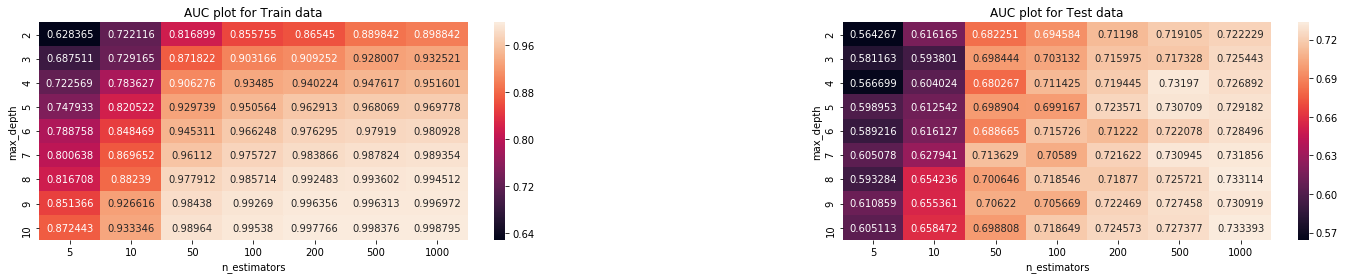

In [118]:
print(rf_bow.best_params_) #Gives the best value of parameters from the given range

train_scores = rf_bow.cv_results_['mean_train_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))
test_scores = rf_bow.cv_results_['mean_test_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))

df_tr=pd.DataFrame(train_scores)
df_tr.index=parameters['max_depth']
df_tr.columns=parameters['n_estimators']

df_te=pd.DataFrame(test_scores)
df_te.index=parameters['max_depth']
df_te.columns=parameters['n_estimators']

plt.subplots(figsize=(24,4))
plt.subplot(1,2,1)
sns.heatmap(df_tr, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Train data')
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
sns.heatmap(df_te, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Test data')
plt.subplots_adjust(wspace=0.5)
plt.show()

plt.close()

In [121]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
rf_clf_bow = RandomForestClassifier(max_depth=10,n_estimators=1000,class_weight='balanced')
rf_clf_bow.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [123]:
x_train_csr=x_train.tocsr()
x_test_csr=x_test.tocsr()

y_train_pred=[]
y_test_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train.shape[0]):
    y_train_pred.extend(rf_clf_bow.predict_proba(x_train_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test.shape[0]):
    y_test_pred.extend(rf_clf_bow.predict_proba(x_test_csr[i])[:,1])

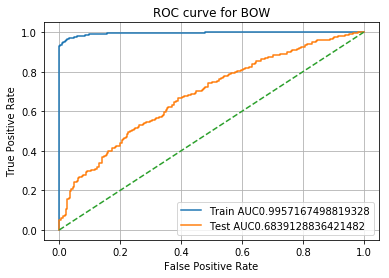

In [124]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC"+str(auc(test_fpr,test_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for BOW")
plt.grid()

plt.show()
plt.close()

In [125]:
np.median(train_thresholds)

0.48950701888909776

In [127]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

predicted_train=[]

expected_train = y_train.values
for i in range(0,x_train.shape[0]):
    predicted_train.extend((rf_clf_bow.predict_proba(x_train_csr[i])[:,1]>= 0.4937).astype(bool))

predicted_test=[]

expected_test = y_test.values
for i in range(0,x_test.shape[0]):
    predicted_test.extend((rf_clf_bow.predict_proba(x_test_csr[i])[:,1]>= 0.4937).astype(bool))

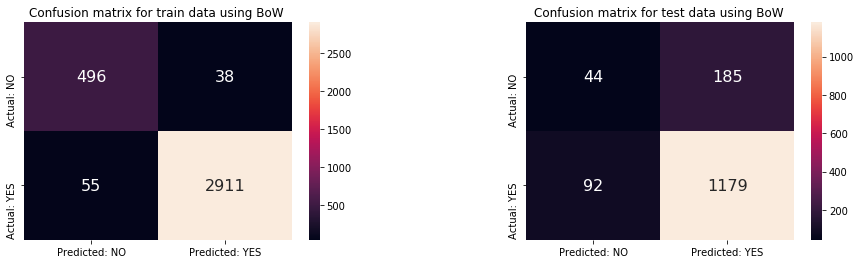

In [128]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_train, predicted_train)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using BoW ')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_test, predicted_test)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using BoW ')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.2 Applying GBDT Classifier brute force on BOW, (GridSearch)

### Hyper paramter tuning method: GridSearch

In [129]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train = hstack((df_train['cat_1'].values.reshape(-1,1), 
                  df_train['cat_0'].values.reshape(-1,1), 
                  df_train['subcat_1'].values.reshape(-1,1),
                  df_train['subcat_0'].values.reshape(-1,1),
                  df_train['state_1'].values.reshape(-1,1), 
                  df_train['state_0'].values.reshape(-1,1),
                  df_train['teacherprefix_1'].values.reshape(-1,1), 
                  df_train['teacherprefix_0'].values.reshape(-1,1),
                  df_train['project_grade_category_1'].values.reshape(-1,1), 
                  df_train['project_grade_category_0'].values.reshape(-1,1),
                  price_train_standardized, 
                  prev_proj_train_standardized, 
                  wc_title_train_standardized, 
                  wc_essay_train_standardized,
                  pos_score_train_standardized,
                  neg_score_train_standardized,
                  neu_score_train_standardized,
                  compound_score_train_standardized, 
                  qty_train_standardized, 
                  text_train_bow, 
                  title_train_bow))

y_train = df_train['project_is_approved']

x_test = hstack((df_test['cat_1'].values.reshape(-1,1), 
                 df_test['cat_0'].values.reshape(-1,1), 
                 df_test['subcat_1'].values.reshape(-1,1),
                 df_test['subcat_0'].values.reshape(-1,1), 
                 df_test['state_1'].values.reshape(-1,1), 
                 df_test['state_0'].values.reshape(-1,1),
                 df_test['teacherprefix_1'].values.reshape(-1,1), 
                 df_test['teacherprefix_0'].values.reshape(-1,1),
                 df_test['project_grade_category_1'].values.reshape(-1,1), 
                 df_test['project_grade_category_0'].values.reshape(-1,1), 
                 price_test_standardized,
                 prev_proj_test_standardized, 
                 wc_title_test_standardized, 
                 wc_essay_test_standardized, 
                 pos_score_test_standardized,
                 neg_score_test_standardized,
                 neu_score_test_standardized,
                 compound_score_test_standardized, 
                 qty_test_standardized, 
                 text_test_bow, 
                 title_test_bow))


y_test = df_test['project_is_approved']

print(x_train.shape, type(x_train), y_train.shape, type(y_train))
print(x_test.shape, type(x_test), y_test.shape, type(y_test))

(3500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [131]:
from sklearn.ensemble import GradientBoostingClassifier
#initailise classifier
clf = GradientBoostingClassifier()
#Brute force approach for finding best K value
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500]}
gbdt_bow = GridSearchCV(clf,parameters,cv=3,return_train_score=True,scoring="roc_auc",n_jobs=-1)
gbdt_bow.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

{'n_estimators': 200}
[0.74828023 0.78500538 0.93411738 0.9702923  0.98785285 0.99985225]
[0.64641864 0.66646348 0.70497693 0.70681904 0.71063276 0.70074865]
[5, 10, 50, 100, 200, 500]


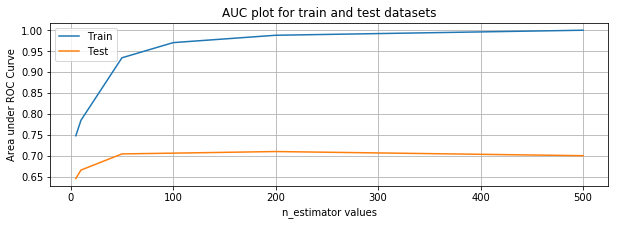

In [132]:
print(gbdt_bow.best_params_) #Gives the best value of parameters from the given range

print(gbdt_bow.cv_results_['mean_train_score'])
print(gbdt_bow.cv_results_['mean_test_score'])
print(parameters['n_estimators'])

plt.figure(figsize=(10,3))
plt.plot(parameters['n_estimators'],gbdt_bow.cv_results_['mean_train_score'], label="Train")
plt.plot(parameters['n_estimators'],gbdt_bow.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('n_estimator values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.close()

In [133]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_gbdt_bow = GradientBoostingClassifier(n_estimators=500)
final_gbdt_bow.fit(x_train,y_train)

x_train_csr=x_train.tocsr()
x_test_csr=x_test.tocsr()

y_train_pred=[]
y_test_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train.shape[0]):
    y_train_pred.extend(final_gbdt_bow.predict_proba(x_train_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test.shape[0]):
    y_test_pred.extend(final_gbdt_bow.predict_proba(x_test_csr[i])[:,1])

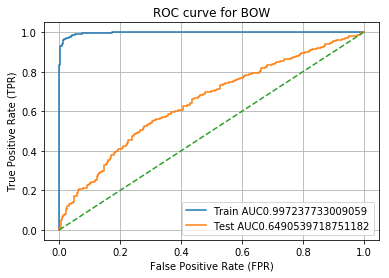

In [134]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC"+str(auc(test_fpr,test_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for BOW")
plt.grid()

plt.show()
plt.close()

In [135]:
np.median(train_thresholds)

0.7326534053595837

In [137]:
from sklearn.metrics import confusion_matrix as cf_mx

predicted_train=[]

expected_train = y_train.values
for i in range(0,x_train.shape[0]):
    predicted_train.extend((final_gbdt_bow.predict_proba(x_train_csr[i])[:,1]>= 0.6207).astype(bool))

predicted_test=[]

expected_test = y_test.values
for i in range(0,x_test.shape[0]):
    predicted_test.extend((final_gbdt_bow.predict_proba(x_test_csr[i])[:,1]>= 0.6207).astype(bool))

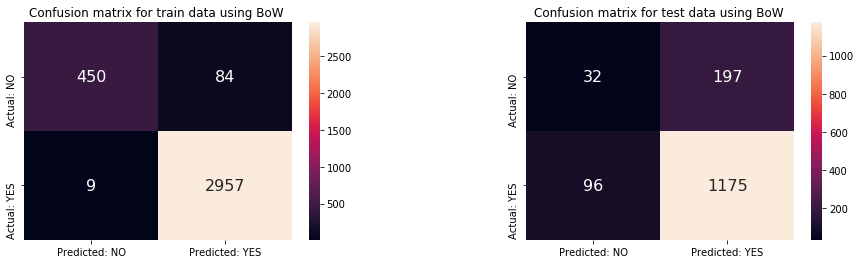

In [138]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_train, predicted_train)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using BoW ')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_test, predicted_test)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using BoW ')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.3 Applying RF Classifier brute force on TFIDF, (GridSearch)

#### Hyper paramter tuning method: GridSearch

In [148]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_tfidf = hstack((df_train['cat_1'].values.reshape(-1,1), 
                        df_train['cat_0'].values.reshape(-1,1), 
                        df_train['subcat_1'].values.reshape(-1,1),
                        df_train['subcat_0'].values.reshape(-1,1), 
                        df_train['state_1'].values.reshape(-1,1), 
                        df_train['state_0'].values.reshape(-1,1),
                        df_train['teacherprefix_1'].values.reshape(-1,1), 
                        df_train['teacherprefix_0'].values.reshape(-1,1),
                        df_train['project_grade_category_1'].values.reshape(-1,1), 
                        df_train['project_grade_category_0'].values.reshape(-1,1), 
                        price_train_standardized,
                        prev_proj_train_standardized, 
                        wc_title_train_standardized,
                        wc_essay_train_standardized, 
                        pos_score_train_standardized,
                        neg_score_train_standardized,
                        neu_score_train_standardized,
                        compound_score_train_standardized,
                        qty_train_standardized, 
                        text_train_tfidf, 
                        title_train_tfidf))

y_train_tfidf = df_train['project_is_approved']

x_test_tfidf = hstack((df_test['cat_1'].values.reshape(-1,1), 
                       df_test['cat_0'].values.reshape(-1,1), 
                       df_test['subcat_1'].values.reshape(-1,1),
                       df_test['subcat_0'].values.reshape(-1,1), 
                       df_test['state_1'].values.reshape(-1,1), 
                       df_test['state_0'].values.reshape(-1,1),
                       df_test['teacherprefix_1'].values.reshape(-1,1), 
                       df_test['teacherprefix_0'].values.reshape(-1,1),
                       df_test['project_grade_category_1'].values.reshape(-1,1), 
                       df_test['project_grade_category_0'].values.reshape(-1,1), 
                       price_test_standardized,
                       prev_proj_test_standardized, 
                       wc_title_test_standardized, 
                       wc_essay_test_standardized, 
                       pos_score_test_standardized,
                       neg_score_test_standardized,
                       neu_score_test_standardized,
                       compound_score_test_standardized,
                       qty_test_standardized, 
                       text_test_tfidf, 
                       title_test_tfidf))

y_test_tfidf = df_test['project_is_approved']

print(x_train_tfidf.shape, type(x_train_tfidf), y_train_tfidf.shape, type(y_train_tfidf))
print(x_test_tfidf.shape, type(x_test_tfidf), y_test_tfidf.shape, type(y_test_tfidf))

(3500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [140]:
clf = RandomForestClassifier(class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [5, 10, 50, 100, 200, 500, 1000]}

#Training the model on train data
rf_tfidf = GridSearchCV(clf, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1)
rf_tfidf.fit(x_train_tfidf, y_train_tfidf)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [5, 10, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

{'max_depth': 10, 'n_estimators': 500}


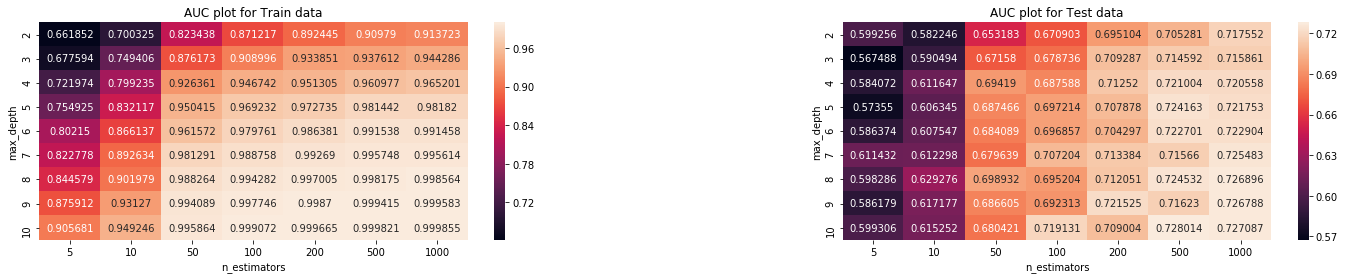

In [141]:
print(rf_tfidf.best_params_) #Gives the best value of parameters from the given range

train_scores = rf_tfidf.cv_results_['mean_train_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))
test_scores = rf_tfidf.cv_results_['mean_test_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))

df_tr=pd.DataFrame(train_scores)
df_tr.index=parameters['max_depth']
df_tr.columns=parameters['n_estimators']

df_te=pd.DataFrame(test_scores)
df_te.index=parameters['max_depth']
df_te.columns=parameters['n_estimators']

plt.subplots(figsize=(24,4))
plt.subplot(1,2,1)
sns.heatmap(df_tr, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Train data')
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
sns.heatmap(df_te, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Test data')
plt.subplots_adjust(wspace=0.5)
plt.show()

plt.close()

In [142]:
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier
#https://stackoverflow.com/questions/34894587/should-we-plot-the-roc-curve-for-each-class

from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_rf_tfidf = RandomForestClassifier(max_depth=10, n_estimators=1000, class_weight='balanced')
final_rf_tfidf.fit(x_train_tfidf,y_train_tfidf)

x_train_tfidf_csr=x_train_tfidf.tocsr()
x_test_tfidf_csr=x_test_tfidf.tocsr()

y_train_tfidf_pred=[]
y_test_tfidf_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_tfidf.shape[0]):
    y_train_tfidf_pred.extend(final_rf_tfidf.predict_proba(x_train_tfidf_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_tfidf.shape[0]):
    y_test_tfidf_pred.extend(final_rf_tfidf.predict_proba(x_test_tfidf_csr[i])[:,1])

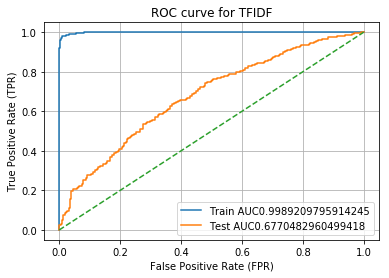

In [143]:
#Calculating FPR and TPR for train and test data
train_tfidf_fpr, train_tfidf_tpr, train_tfidf_thresholds = roc_curve(y_train_tfidf, y_train_tfidf_pred)
test_tfidf_fpr, test_tfidf_tpr, test_tfidf_thresholds = roc_curve(y_test_tfidf, y_test_tfidf_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train AUC"+str(auc(train_tfidf_fpr, train_tfidf_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test AUC"+str(auc(test_tfidf_fpr, test_tfidf_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for TFIDF")
plt.grid()
plt.show()
plt.close()

In [144]:
print(np.median(train_tfidf_thresholds))

0.5134696215611403


In [145]:
from sklearn.metrics import confusion_matrix as cf_mx

predicted_train_tfidf=[]

expected_train_tfidf = y_train_tfidf.values
for i in range(0,x_train_tfidf_csr.shape[0]):
    predicted_train_tfidf.extend((final_rf_tfidf.predict_proba(x_train_tfidf_csr[i])[:,1]>= 0.4995).astype(bool))

predicted_test_tfidf=[]

expected_test_tfidf = y_test_tfidf.values
for i in range(0,x_test_tfidf_csr.shape[0]):
    predicted_test_tfidf.extend((final_rf_tfidf.predict_proba(x_test_tfidf_csr[i])[:,1]>= 0.4995).astype(bool))

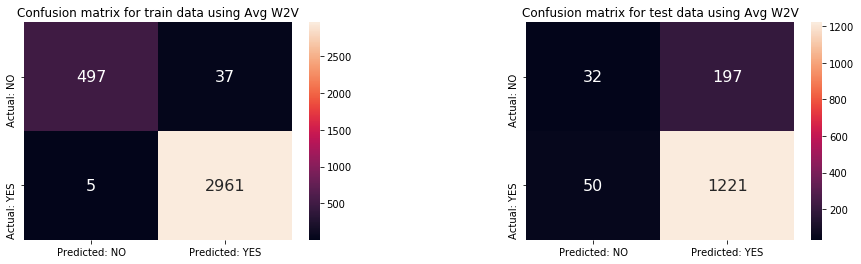

In [146]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_train_tfidf, predicted_train_tfidf)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using Avg W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_test_tfidf, predicted_test_tfidf)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using Avg W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.4 Applying GBDT Classifier brute force on TFIDF, (GridSearch)

### Hyper paramter tuning method: GridSearch

In [147]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_tfidf = hstack((df_train['cat_1'].values.reshape(-1,1), 
                        df_train['cat_0'].values.reshape(-1,1), 
                        df_train['subcat_1'].values.reshape(-1,1),
                        df_train['subcat_0'].values.reshape(-1,1), 
                        df_train['state_1'].values.reshape(-1,1), 
                        df_train['state_0'].values.reshape(-1,1),
                        df_train['teacherprefix_1'].values.reshape(-1,1), 
                        df_train['teacherprefix_0'].values.reshape(-1,1),
                        df_train['project_grade_category_1'].values.reshape(-1,1), 
                        df_train['project_grade_category_0'].values.reshape(-1,1), 
                        price_train_standardized,
                        prev_proj_train_standardized, 
                        wc_title_train_standardized,
                        wc_essay_train_standardized, 
                        pos_score_train_standardized,
                        neg_score_train_standardized,
                        neu_score_train_standardized,
                        compound_score_train_standardized,
                        qty_train_standardized, 
                        text_train_tfidf, 
                        title_train_tfidf))

y_train_tfidf = df_train['project_is_approved']

x_test_tfidf = hstack((df_test['cat_1'].values.reshape(-1,1), 
                       df_test['cat_0'].values.reshape(-1,1), 
                       df_test['subcat_1'].values.reshape(-1,1),
                       df_test['subcat_0'].values.reshape(-1,1), 
                       df_test['state_1'].values.reshape(-1,1), 
                       df_test['state_0'].values.reshape(-1,1),
                       df_test['teacherprefix_1'].values.reshape(-1,1), 
                       df_test['teacherprefix_0'].values.reshape(-1,1),
                       df_test['project_grade_category_1'].values.reshape(-1,1), 
                       df_test['project_grade_category_0'].values.reshape(-1,1), 
                       price_test_standardized,
                       prev_proj_test_standardized, 
                       wc_title_test_standardized, 
                       wc_essay_test_standardized, 
                       pos_score_test_standardized,
                       neg_score_test_standardized,
                       neu_score_test_standardized,
                       compound_score_test_standardized,
                       qty_test_standardized, 
                       text_test_tfidf, 
                       title_test_tfidf))

y_test_tfidf = df_test['project_is_approved']

print(x_train_tfidf.shape, type(x_train_tfidf), y_train_tfidf.shape, type(y_train_tfidf))
print(x_test_tfidf.shape, type(x_test_tfidf), y_test_tfidf.shape, type(y_test_tfidf))

(3500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 3880) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [149]:
clf = GradientBoostingClassifier()

#Brute force approach for finding best K value
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500]}

#Training the model on train data
gbdt_tfidf = GridSearchCV(clf, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1)
gbdt_tfidf.fit(x_train_tfidf, y_train_tfidf)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

{'n_estimators': 100}
[0.73426637 0.797753   0.93707419 0.98122396 0.99909027 0.99999811]
[0.63958061 0.66207336 0.68530899 0.69077087 0.68884267 0.67906349]
[5, 10, 50, 100, 200, 500]


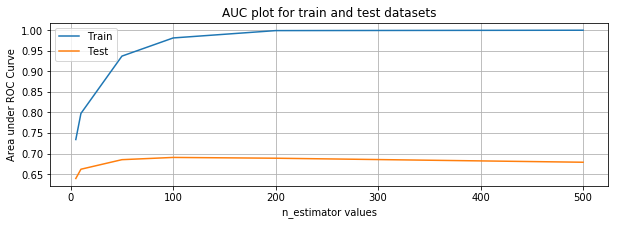

In [150]:
print(gbdt_tfidf.best_params_) #Gives the best value of parameters from the given range

print(gbdt_tfidf.cv_results_['mean_train_score'])
print(gbdt_tfidf.cv_results_['mean_test_score'])
print(parameters['n_estimators'])

plt.figure(figsize=(10,3))
plt.plot(parameters['n_estimators'],gbdt_tfidf.cv_results_['mean_train_score'], label="Train")
plt.plot(parameters['n_estimators'],gbdt_tfidf.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('n_estimator values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.close()

In [151]:
from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_gbdt_tfidf = GradientBoostingClassifier(n_estimators=500)
final_gbdt_tfidf.fit(x_train_tfidf,y_train_tfidf)

x_train_tfidf_csr=x_train_tfidf.tocsr()
x_test_tfidf_csr=x_test_tfidf.tocsr()

y_train_tfidf_pred=[]
y_test_tfidf_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_tfidf.shape[0]):
    y_train_tfidf_pred.extend(final_gbdt_tfidf.predict_proba(x_train_tfidf_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_tfidf.shape[0]):
    y_test_tfidf_pred.extend(final_gbdt_tfidf.predict_proba(x_test_tfidf_csr[i])[:,1])

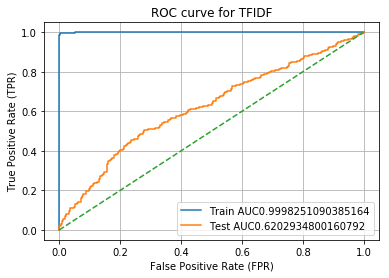

In [152]:
#Calculating FPR and TPR for train and test data
train_tfidf_fpr, train_tfidf_tpr, train_tfidf_thresholds = roc_curve(y_train_tfidf, y_train_tfidf_pred)
test_tfidf_fpr, test_tfidf_tpr, test_tfidf_thresholds = roc_curve(y_test_tfidf, y_test_tfidf_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train AUC"+str(auc(train_tfidf_fpr, train_tfidf_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test AUC"+str(auc(test_tfidf_fpr, test_tfidf_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for TFIDF")
plt.grid()
plt.show()
plt.close()

In [153]:
print(np.median(train_tfidf_thresholds))

0.7297027499105925


In [154]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#https://datatofish.com/confusion-matrix-python/

from sklearn.metrics import confusion_matrix as cf_mx

predicted_train_tfidf=[]

expected_train_tfidf = y_train_tfidf.values
for i in range(0,x_train.shape[0]):
    predicted_train_tfidf.extend((final_gbdt_tfidf.predict_proba(x_train_tfidf_csr[i])[:,1]>= 0.6252).astype(bool))

predicted_test_tfidf=[]

expected_test_tfidf = y_test_tfidf.values
for i in range(0,x_test.shape[0]):
    predicted_test_tfidf.extend((final_gbdt_tfidf.predict_proba(x_test_tfidf_csr[i])[:,1]>= 0.6252).astype(bool))

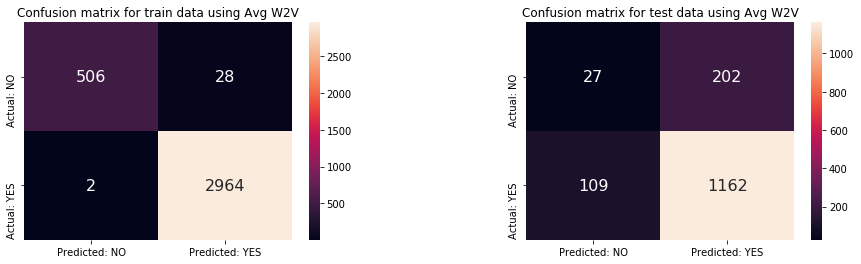

In [155]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_train_tfidf, predicted_train_tfidf)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using Avg W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_test_tfidf, predicted_test_tfidf)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using Avg W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.5 Applying RF Classifier brute force on AVG W2V

### Hyper paramter tuning method: GridSearch

In [156]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_avg_w2v = hstack((df_train['cat_1'].values.reshape(-1,1), 
                          df_train['cat_0'].values.reshape(-1,1), 
                          df_train['subcat_1'].values.reshape(-1,1),
                          df_train['subcat_0'].values.reshape(-1,1), 
                          df_train['state_1'].values.reshape(-1,1), 
                          df_train['state_0'].values.reshape(-1,1),
                          df_train['teacherprefix_1'].values.reshape(-1,1), 
                          df_train['teacherprefix_0'].values.reshape(-1,1),
                          df_train['project_grade_category_1'].values.reshape(-1,1), 
                          df_train['project_grade_category_0'].values.reshape(-1,1), 
                          price_train_standardized, 
                          prev_proj_train_standardized,
                          wc_title_train_standardized, 
                          wc_essay_train_standardized, 
                          pos_score_train_standardized,
                          neg_score_train_standardized,
                          neu_score_train_standardized,
                          compound_score_train_standardized,
                          qty_train_standardized, 
                          title_train_bow, 
                          avg_w2v_train_text_vectors, 
                          avg_w2v_title_train_vectors))


y_train_avg_w2v = df_train['project_is_approved']

x_test_avg_w2v = hstack((df_test['cat_1'].values.reshape(-1,1), 
                         df_test['cat_0'].values.reshape(-1,1), 
                         df_test['subcat_1'].values.reshape(-1,1),
                         df_test['subcat_0'].values.reshape(-1,1), 
                         df_test['state_1'].values.reshape(-1,1), 
                         df_test['state_0'].values.reshape(-1,1),
                         df_test['teacherprefix_1'].values.reshape(-1,1), 
                         df_test['teacherprefix_0'].values.reshape(-1,1), 
                         df_test['project_grade_category_1'].values.reshape(-1,1), 
                         df_test['project_grade_category_0'].values.reshape(-1,1), 
                         price_test_standardized,
                         prev_proj_test_standardized, 
                         wc_title_test_standardized, 
                         wc_essay_test_standardized, 
                         pos_score_test_standardized,
                         neg_score_test_standardized,
                         neu_score_test_standardized,
                         compound_score_test_standardized,
                         qty_test_standardized, 
                         title_test_bow, 
                         avg_w2v_test_text_vectors, 
                         avg_w2v_title_test_vectors))


y_test_avg_w2v = df_test['project_is_approved']

print(x_train_avg_w2v.shape, type(x_train_avg_w2v), y_train_avg_w2v.shape, type(y_train_avg_w2v))
print(x_test_avg_w2v.shape, type(x_test_avg_w2v), y_test_avg_w2v.shape, type(y_test_avg_w2v))

(3500, 849) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 849) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [158]:
clf = RandomForestClassifier(class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [5, 10, 50, 100, 200, 500, 1000]}

#Training the model on train data
rf_avg_w2v = GridSearchCV(clf, parameters, return_train_score=True, cv=3, scoring='roc_auc', n_jobs=-1)
rf_avg_w2v.fit(x_train_avg_w2v, y_train_avg_w2v)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [5, 10, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

{'max_depth': 4, 'n_estimators': 1000}


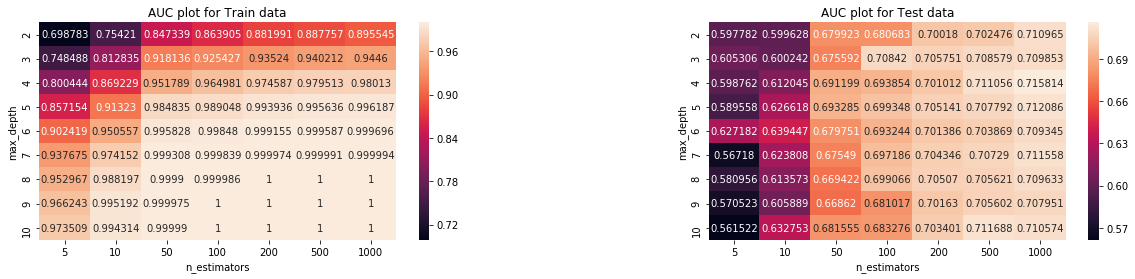

In [159]:
print(rf_avg_w2v.best_params_) #Gives the best value of parameters from the given range

train_scores = rf_avg_w2v.cv_results_['mean_train_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))
test_scores = rf_avg_w2v.cv_results_['mean_test_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))

df_tr=pd.DataFrame(train_scores)
df_tr.index=parameters['max_depth']
df_tr.columns=parameters['n_estimators']

df_te=pd.DataFrame(test_scores)
df_te.index=parameters['max_depth']
df_te.columns=parameters['n_estimators']

plt.subplots(figsize=(20,4))
plt.subplot(1,2,1)
sns.heatmap(df_tr, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Train data')
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
sns.heatmap(df_te, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Test data')
plt.subplots_adjust(wspace=0.5)
plt.show()

plt.close()

In [160]:
from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_rf_avg_w2v = RandomForestClassifier(max_depth=10, n_estimators=500, class_weight='balanced')
final_rf_avg_w2v.fit(x_train_avg_w2v, y_train_avg_w2v)

x_train_avg_w2v_csr=x_train_avg_w2v.tocsr()
x_test_avg_w2v_csr=x_test_avg_w2v.tocsr()

y_train_avg_w2v_pred=[]
y_test_avg_w2v_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_avg_w2v.shape[0]):
    y_train_avg_w2v_pred.extend(final_rf_avg_w2v.predict_proba(x_train_avg_w2v_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_avg_w2v.shape[0]):
    y_test_avg_w2v_pred.extend(final_rf_avg_w2v.predict_proba(x_test_avg_w2v_csr[i])[:,1])

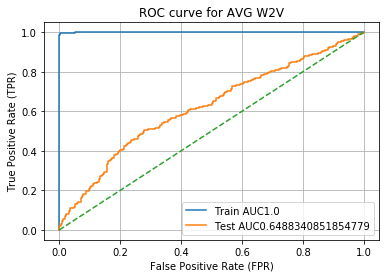

In [161]:
#Calculating FPR and TPR for train and test data
train_avg_w2v_fpr, train_avg_w2v_tpr, train_avg_w2v_thresholds = roc_curve(y_train_avg_w2v, y_train_avg_w2v_pred)
test_avg_w2v_fpr, test_avg_w2v_tpr, test_avg_w2v_thresholds = roc_curve(y_test_avg_w2v, y_test_avg_w2v_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train AUC"+str(auc(train_avg_w2v_fpr, train_avg_w2v_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test AUC"+str(auc(test_avg_w2v_fpr, test_avg_w2v_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for AVG W2V")
plt.grid()
plt.show()
plt.close()


In [162]:
print(np.median(train_avg_w2v_thresholds))

0.577891439588181


In [163]:
from sklearn.metrics import confusion_matrix as cf_mx

predicted_avg_train_w2v=[]

expected_avg_train_w2v = y_train_avg_w2v.values
for i in range(0,x_train_avg_w2v.shape[0]):
    predicted_avg_train_w2v.extend((final_rf_avg_w2v.predict_proba(x_train_avg_w2v_csr[i])[:,1]>= 0.501).astype(bool))

predicted_avg_test_w2v =[]
expected_avg_test_w2v = y_test_avg_w2v.values
for i in range(0,x_test_avg_w2v.shape[0]):
    predicted_avg_test_w2v.extend((final_rf_avg_w2v.predict_proba(x_test_avg_w2v_csr[i])[:,1]>= 0.501).astype(bool))

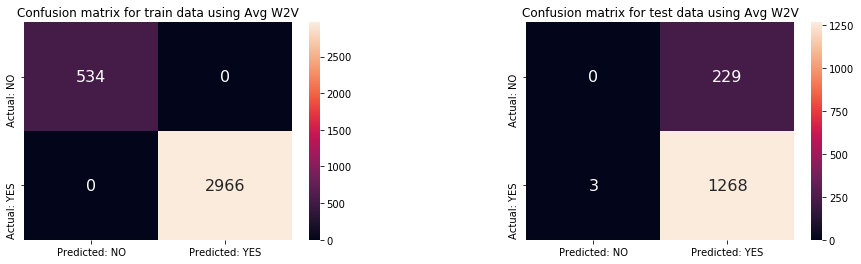

In [164]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_avg_train_w2v, predicted_avg_train_w2v)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using Avg W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_avg_test_w2v, predicted_avg_test_w2v)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using Avg W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.6 Applying GBDT Classifier brute force on AVG W2V,

### Hyper paramter tuning method: GridSearch

In [165]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_avg_w2v = hstack((df_train['cat_1'].values.reshape(-1,1), 
                          df_train['cat_0'].values.reshape(-1,1), 
                          df_train['subcat_1'].values.reshape(-1,1),
                          df_train['subcat_0'].values.reshape(-1,1), 
                          df_train['state_1'].values.reshape(-1,1), 
                          df_train['state_0'].values.reshape(-1,1),
                          df_train['teacherprefix_1'].values.reshape(-1,1), 
                          df_train['teacherprefix_0'].values.reshape(-1,1),
                          df_train['project_grade_category_1'].values.reshape(-1,1), 
                          df_train['project_grade_category_0'].values.reshape(-1,1), 
                          price_train_standardized, 
                          prev_proj_train_standardized,
                          wc_title_train_standardized, 
                          wc_essay_train_standardized, 
                          pos_score_train_standardized,
                          neg_score_train_standardized,
                          neu_score_train_standardized,
                          compound_score_train_standardized,
                          qty_train_standardized, 
                          title_train_bow, 
                          avg_w2v_train_text_vectors, 
                          avg_w2v_title_train_vectors))


y_train_avg_w2v = df_train['project_is_approved']

x_test_avg_w2v = hstack((df_test['cat_1'].values.reshape(-1,1), 
                         df_test['cat_0'].values.reshape(-1,1), 
                         df_test['subcat_1'].values.reshape(-1,1),
                         df_test['subcat_0'].values.reshape(-1,1), 
                         df_test['state_1'].values.reshape(-1,1), 
                         df_test['state_0'].values.reshape(-1,1),
                         df_test['teacherprefix_1'].values.reshape(-1,1), 
                         df_test['teacherprefix_0'].values.reshape(-1,1), 
                         df_test['project_grade_category_1'].values.reshape(-1,1), 
                         df_test['project_grade_category_0'].values.reshape(-1,1), 
                         price_test_standardized,
                         prev_proj_test_standardized, 
                         wc_title_test_standardized, 
                         wc_essay_test_standardized, 
                         pos_score_test_standardized,
                         neg_score_test_standardized,
                         neu_score_test_standardized,
                         compound_score_test_standardized,
                         qty_test_standardized, 
                         title_test_bow, 
                         avg_w2v_test_text_vectors, 
                         avg_w2v_title_test_vectors))


y_test_avg_w2v = df_test['project_is_approved']

print(x_train_avg_w2v.shape, type(x_train_avg_w2v), y_train_avg_w2v.shape, type(y_train_avg_w2v))
print(x_test_avg_w2v.shape, type(x_test_avg_w2v), y_test_avg_w2v.shape, type(y_test_avg_w2v))

(3500, 849) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 849) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [166]:
#Initialising Classifier
clf = GradientBoostingClassifier()

#Brute force approach for finding best K value
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500]}

#Training the model on train data
gbdt_avg_w2v = GridSearchCV(clf, parameters, return_train_score=True, cv=3, scoring='roc_auc', n_jobs=-1)
gbdt_avg_w2v.fit(x_train_avg_w2v, y_train_avg_w2v)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

{'n_estimators': 200}
[0.74841388 0.82105506 0.96582606 0.99181301 0.99990386 1.        ]
[0.64692992 0.66015025 0.69480444 0.69643141 0.69873658 0.69253272]
[5, 10, 50, 100, 200, 500]


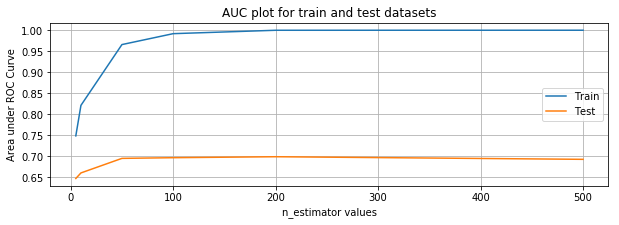

In [167]:
print(gbdt_avg_w2v.best_params_) #Gives the best value of parameters from the given range

print(gbdt_avg_w2v.cv_results_['mean_train_score'])
print(gbdt_avg_w2v.cv_results_['mean_test_score'])
print(parameters['n_estimators'])

plt.figure(figsize=(10,3))
plt.plot(parameters['n_estimators'],gbdt_avg_w2v.cv_results_['mean_train_score'], label="Train")
plt.plot(parameters['n_estimators'],gbdt_avg_w2v.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('n_estimator values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.close()

In [168]:
from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_gbdt_avg_w2v = GradientBoostingClassifier(n_estimators=200)
final_gbdt_avg_w2v.fit(x_train_avg_w2v, y_train_avg_w2v)

x_train_avg_w2v_csr=x_train_avg_w2v.tocsr()
x_test_avg_w2v_csr=x_test_avg_w2v.tocsr()

y_train_avg_w2v_pred=[]
y_test_avg_w2v_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_avg_w2v.shape[0]):
    y_train_avg_w2v_pred.extend(final_gbdt_avg_w2v.predict_proba(x_train_avg_w2v_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_avg_w2v.shape[0]):
    y_test_avg_w2v_pred.extend(final_gbdt_avg_w2v.predict_proba(x_test_avg_w2v_csr[i])[:,1])

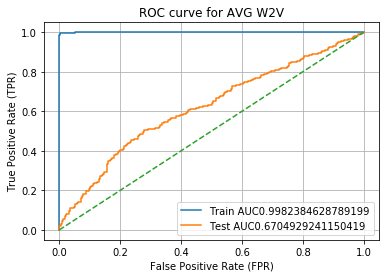

In [169]:
#Calculating FPR and TPR for train and test data
train_avg_w2v_fpr, train_avg_w2v_tpr, train_avg_w2v_thresholds = roc_curve(y_train_avg_w2v, y_train_avg_w2v_pred)
test_avg_w2v_fpr, test_avg_w2v_tpr, test_avg_w2v_thresholds = roc_curve(y_test_avg_w2v, y_test_avg_w2v_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train AUC"+str(auc(train_avg_w2v_fpr, train_avg_w2v_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test AUC"+str(auc(test_avg_w2v_fpr, test_avg_w2v_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for AVG W2V")
plt.grid()
plt.show()
plt.close()

In [170]:
print(np.median(train_avg_w2v_thresholds))

0.7226922159202095


In [171]:
from sklearn.metrics import confusion_matrix as cf_mx

predicted_avg_train_w2v=[]

expected_avg_train_w2v = y_train_avg_w2v.values
for i in range(0,x_train_avg_w2v.shape[0]):
    predicted_avg_train_w2v.extend((final_gbdt_avg_w2v.predict_proba(x_train_avg_w2v_csr[i])[:,1]>= 0.6485).astype(bool))

predicted_avg_test_w2v=[]

expected_avg_test_w2v = y_test_avg_w2v.values
for i in range(0,x_test_avg_w2v.shape[0]):
    predicted_avg_test_w2v.extend((final_gbdt_avg_w2v.predict_proba(x_test_avg_w2v_csr[i])[:,1]>= 0.6485).astype(bool))

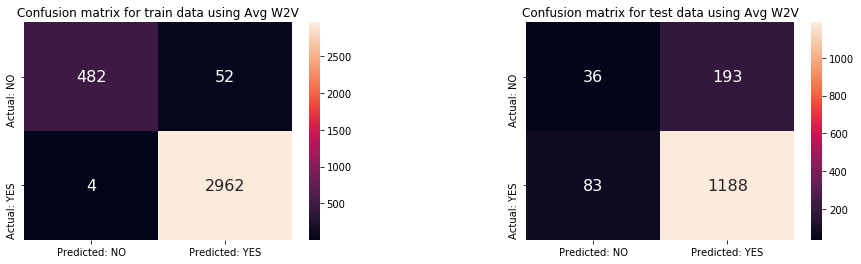

In [172]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_avg_train_w2v, predicted_avg_train_w2v)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using Avg W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_avg_test_w2v, predicted_avg_test_w2v)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using Avg W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.7 Applying RF Classifier brute force on TFIDF W2V

### Hyper paramter tuning method: GridSearch

In [173]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_tfidf_w2v = hstack((df_train['cat_1'].values.reshape(-1,1), 
                            df_train['cat_0'].values.reshape(-1,1), 
                            df_train['subcat_1'].values.reshape(-1,1),
                            df_train['subcat_0'].values.reshape(-1,1), 
                            df_train['state_1'].values.reshape(-1,1), 
                            df_train['state_0'].values.reshape(-1,1),
                            df_train['teacherprefix_1'].values.reshape(-1,1), 
                            df_train['teacherprefix_0'].values.reshape(-1,1),
                            df_train['project_grade_category_1'].values.reshape(-1,1), 
                            df_train['project_grade_category_0'].values.reshape(-1,1), 
                            price_train_standardized,
                            prev_proj_train_standardized, 
                            wc_title_train_standardized, 
                            wc_essay_train_standardized, 
                            pos_score_train_standardized,
                            neg_score_train_standardized,
                            neu_score_train_standardized,
                            compound_score_train_standardized,
                            qty_train_standardized, 
                            title_train_bow, 
                            tfidf_w2v_train_text_vectors, 
                            tfidf_w2v_train_title_vectors))


y_train_tfidf_w2v = df_train['project_is_approved']

x_test_tfidf_w2v = hstack((df_test['cat_1'].values.reshape(-1,1), 
                           df_test['cat_0'].values.reshape(-1,1), 
                           df_test['subcat_1'].values.reshape(-1,1),
                           df_test['subcat_0'].values.reshape(-1,1), 
                           df_test['state_1'].values.reshape(-1,1), 
                           df_test['state_0'].values.reshape(-1,1),
                           df_test['teacherprefix_1'].values.reshape(-1,1), 
                           df_test['teacherprefix_0'].values.reshape(-1,1), 
                           df_test['project_grade_category_1'].values.reshape(-1,1), 
                           df_test['project_grade_category_0'].values.reshape(-1,1), 
                           price_test_standardized,
                           prev_proj_test_standardized, 
                           wc_title_test_standardized, 
                           wc_essay_test_standardized, 
                           pos_score_test_standardized,
                           neg_score_test_standardized,
                           neu_score_test_standardized,
                           compound_score_test_standardized,
                           qty_test_standardized, 
                           title_test_bow, 
                           tfidf_w2v_test_text_vectors, 
                           tfidf_w2v_test_title_vectors))

y_test_tfidf_w2v = df_test['project_is_approved']

print(x_train_tfidf_w2v.shape, type(x_train_tfidf_w2v), y_train_tfidf_w2v.shape, type(y_train_tfidf_w2v))
print(x_test_tfidf_w2v.shape, type(x_test_tfidf_w2v), y_test_tfidf_w2v.shape, type(y_test_tfidf_w2v))

(3500, 849) <class 'scipy.sparse.coo.coo_matrix'> (3500,) <class 'pandas.core.series.Series'>
(1500, 849) <class 'scipy.sparse.coo.coo_matrix'> (1500,) <class 'pandas.core.series.Series'>


In [174]:
#Initialising Classifier
clf = RandomForestClassifier(class_weight='balanced')

#Brute force approach for finding best K value
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [5, 10, 50, 100, 200, 500, 1000]}

#Training the model on train data
rf_tfidf_w2v = GridSearchCV(clf, parameters, return_train_score=True, cv=3, scoring='roc_auc', n_jobs=-1)
rf_tfidf_w2v.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [5, 10, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

{'max_depth': 5, 'n_estimators': 1000}


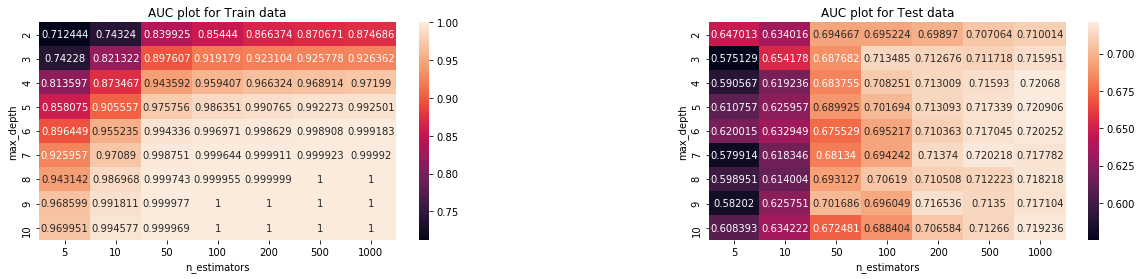

In [175]:
print(rf_tfidf_w2v.best_params_) #Gives the best value of parameters from the given range

train_scores = rf_tfidf_w2v.cv_results_['mean_train_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))
test_scores = rf_tfidf_w2v.cv_results_['mean_test_score'].reshape(len(parameters['max_depth']),len(parameters['n_estimators']))

df_tr=pd.DataFrame(train_scores)
df_tr.index=parameters['max_depth']
df_tr.columns=parameters['n_estimators']

df_te=pd.DataFrame(test_scores)
df_te.index=parameters['max_depth']
df_te.columns=parameters['n_estimators']

plt.subplots(figsize=(20,4))
plt.subplot(1,2,1)
sns.heatmap(df_tr, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Train data')
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
sns.heatmap(df_te, annot=True,annot_kws={"size": 10}, fmt='g')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('AUC plot for Test data')
plt.subplots_adjust(wspace=0.5)
plt.show()

plt.close()

In [ ]:
from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_rf_tfidf_w2v = RandomForestClassifier(max_depth=10, n_estimators=1000, class_weight='balanced')
final_rf_tfidf_w2v.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)

x_train_tfidf_w2v_csr=x_train_tfidf_w2v.tocsr()
x_test_tfidf_w2v_csr=x_test_tfidf_w2v.tocsr()

y_train_tfidf_w2v_pred=[]
y_test_tfidf_w2v_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_tfidf_w2v.shape[0]):
    y_train_tfidf_w2v_pred.extend(final_rf_tfidf_w2v.predict_proba(x_train_tfidf_w2v_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_tfidf_w2v.shape[0]):
    y_test_tfidf_w2v_pred.extend(final_rf_tfidf_w2v.predict_proba(x_test_tfidf_w2v_csr[i])[:,1])

In [ ]:
#Calculating FPR and TPR for train and test data
train_tfidf_w2v_fpr, train_tfidf_w2v_tpr, train_tfidf_w2v_thresholds = roc_curve(y_train_tfidf_w2v, y_train_tfidf_w2v_pred)
test_tfidf_w2v_fpr, test_tfidf_w2v_tpr, test_tfidf_w2v_thresholds = roc_curve(y_test_tfidf_w2v, y_test_tfidf_w2v_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train AUC"+str(auc(train_tfidf_w2v_fpr, train_tfidf_w2v_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test AUC"+str(auc(test_tfidf_w2v_fpr, test_tfidf_w2v_tpr)))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for TFIDF AVGW2V")
plt.grid()
plt.show()
plt.close()

In [ ]:
print(np.median(train_tfidf_w2v_thresholds))

In [ ]:
from sklearn.metrics import confusion_matrix as cf_mx

predicted_tfidf_train_w2v=[]

expected_tfidf_train_w2v = y_train_tfidf_w2v.values

for i in range(0,x_train_tfidf_w2v.shape[0]):
    predicted_tfidf_train_w2v.extend((final_rf_tfidf_w2v.predict_proba(x_train_tfidf_w2v_csr[i])[:,1]>=0.4941).astype(bool))

predicted_tfidf_test_w2v=[]

expected_tfidf_test_w2v = y_test_tfidf_w2v.values

for i in range(0,x_test_tfidf_w2v.shape[0]):
    predicted_tfidf_test_w2v.extend((final_rf_tfidf_w2v.predict_proba(x_test_tfidf_w2v_csr[i])[:,1]>=0.4941).astype(bool))

In [ ]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_tfidf_train_w2v, predicted_tfidf_train_w2v)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using TFIDF W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_tfidf_test_w2v, predicted_tfidf_test_w2v)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using TFIDF W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

### 2.4.8 Applying GBDT Classifier brute force on TFIDF W2V,

### Hyper paramter tuning method: GridSearch

In [ ]:
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.metrics import roc_auc_score

x_train_tfidf_w2v = hstack((df_train['cat_1'].values.reshape(-1,1), 
                            df_train['cat_0'].values.reshape(-1,1), 
                            df_train['subcat_1'].values.reshape(-1,1),
                            df_train['subcat_0'].values.reshape(-1,1), 
                            df_train['state_1'].values.reshape(-1,1), 
                            df_train['state_0'].values.reshape(-1,1),
                            df_train['teacherprefix_1'].values.reshape(-1,1), 
                            df_train['teacherprefix_0'].values.reshape(-1,1),
                            df_train['project_grade_category_1'].values.reshape(-1,1), 
                            df_train['project_grade_category_0'].values.reshape(-1,1), 
                            price_train_standardized,
                            prev_proj_train_standardized, 
                            wc_title_train_standardized, 
                            wc_essay_train_standardized, 
                            pos_score_train_standardized,
                            neg_score_train_standardized,
                            neu_score_train_standardized,
                            compound_score_train_standardized,
                            qty_train_standardized, 
                            title_train_bow, 
                            tfidf_w2v_train_text_vectors, 
                            tfidf_w2v_train_title_vectors))


y_train_tfidf_w2v = df_train['project_is_approved']

x_test_tfidf_w2v = hstack((df_test['cat_1'].values.reshape(-1,1), 
                           df_test['cat_0'].values.reshape(-1,1), 
                           df_test['subcat_1'].values.reshape(-1,1),
                           df_test['subcat_0'].values.reshape(-1,1), 
                           df_test['state_1'].values.reshape(-1,1), 
                           df_test['state_0'].values.reshape(-1,1),
                           df_test['teacherprefix_1'].values.reshape(-1,1), 
                           df_test['teacherprefix_0'].values.reshape(-1,1), 
                           df_test['project_grade_category_1'].values.reshape(-1,1), 
                           df_test['project_grade_category_0'].values.reshape(-1,1), 
                           price_test_standardized,
                           prev_proj_test_standardized, 
                           wc_title_test_standardized, 
                           wc_essay_test_standardized, 
                           pos_score_test_standardized,
                           neg_score_test_standardized,
                           neu_score_test_standardized,
                           compound_score_test_standardized,
                           qty_test_standardized, 
                           title_test_bow, 
                           tfidf_w2v_test_text_vectors, 
                           tfidf_w2v_test_title_vectors))

y_test_tfidf_w2v = df_test['project_is_approved']

print(x_train_tfidf_w2v.shape, type(x_train_tfidf_w2v), y_train_tfidf_w2v.shape, type(y_train_tfidf_w2v))
print(x_test_tfidf_w2v.shape, type(x_test_tfidf_w2v), y_test_tfidf_w2v.shape, type(y_test_tfidf_w2v))

In [ ]:
#Initialising Classifier
clf = GradientBoostingClassifier()

#Brute force approach for finding best K value
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500]}

#Training the model on train data
gbdt_tfidf_w2v = GridSearchCV(clf, parameters, return_train_score=True, cv=3, scoring='roc_auc', n_jobs=-1)
gbdt_tfidf_w2v.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)

In [ ]:
print(gbdt_tfidf_w2v.best_params_) #Gives the best value of parameters from the given range

print(gbdt_tfidf_w2v.cv_results_['mean_train_score'])
print(gbdt_tfidf_w2v.cv_results_['mean_test_score'])
print(parameters['n_estimators'])

plt.figure(figsize=(10,3))
plt.plot(parameters['n_estimators'],gbdt_tfidf_w2v.cv_results_['mean_train_score'], label="Train")
plt.plot(parameters['n_estimators'],gbdt_tfidf_w2v.cv_results_['mean_test_score'], label="Test")
plt.title('AUC plot for train and test datasets')
plt.xlabel('n_estimator values')
plt.ylabel('Area under ROC Curve')
plt.legend()
plt.grid()
plt.show()
plt.close()

plt.close()

In [ ]:
from sklearn.metrics import roc_curve, auc

#training the model on the best K value found in the above result 
final_gbdt_tfidf_w2v = GradientBoostingClassifier(n_estimators=200)
final_gbdt_tfidf_w2v.fit(x_train_tfidf_w2v, y_train_tfidf_w2v)

x_train_tfidf_w2v_csr=x_train_tfidf_w2v.tocsr()
x_test_tfidf_w2v_csr=x_test_tfidf_w2v.tocsr()

y_train_tfidf_w2v_pred=[]
y_test_tfidf_w2v_pred=[]

#ROC curve function takes the actual values and the predicted probabilities of the positive class
for i in range(0,x_train_tfidf_w2v.shape[0]):
    y_train_tfidf_w2v_pred.extend(final_gbdt_tfidf_w2v.predict_proba(x_train_tfidf_w2v_csr[i])[:,1]) #[:,1] gives the probability for class 1

for i in range(0,x_test_tfidf_w2v.shape[0]):
    y_test_tfidf_w2v_pred.extend(final_gbdt_tfidf_w2v.predict_proba(x_test_tfidf_w2v_csr[i])[:,1])

In [ ]:
#Calculating FPR and TPR for train and test data
train_tfidf_w2v_fpr, train_tfidf_w2v_tpr, train_tfidf_w2v_thresholds = roc_curve(y_train_tfidf_w2v, y_train_tfidf_w2v_pred)
test_tfidf_w2v_fpr, test_tfidf_w2v_tpr, test_tfidf_w2v_thresholds = roc_curve(y_test_tfidf_w2v, y_test_tfidf_w2v_pred)

#Calculating AUC for train and test curves
roc_auc_tfidf_w2v_train=auc(train_tfidf_w2v_fpr,train_tfidf_w2v_tpr)
roc_auc_tfidf_w2v_test=auc(test_tfidf_w2v_fpr,test_tfidf_w2v_tpr)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="Train AUC"+str(auc(train_tfidf_w2v_fpr, train_tfidf_w2v_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="Test AUC"+str(auc(test_tfidf_w2v_fpr, test_tfidf_w2v_tpr))
plt.plot([0,1],[0,1],linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve for TFIDF AVGW2V")
plt.grid()
plt.show()
plt.close()

In [ ]:
print(np.median(train_tfidf_w2v_thresholds))

In [ ]:
from sklearn.metrics import confusion_matrix as cf_mx

predicted_tfidf_train_w2v=[]

expected_tfidf_train_w2v = y_train_tfidf_w2v.values

for i in range(0,x_train_tfidf_w2v.shape[0]):
    predicted_tfidf_train_w2v.extend((final_gbdt_tfidf_w2v.predict_proba(x_train_tfidf_w2v_csr[i])[:,1]>=0.642).astype(bool))

predicted_tfidf_test_w2v=[]

expected_tfidf_test_w2v = y_test_tfidf_w2v.values

for i in range(0,x_test_tfidf_w2v.shape[0]):
    predicted_tfidf_test_w2v.extend((final_gbdt_tfidf_w2v.predict_proba(x_test_tfidf_w2v_csr[i])[:,1]>=0.642).astype(bool))

In [ ]:
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
cmdf_train=cf_mx(expected_tfidf_train_w2v, predicted_tfidf_train_w2v)
df_cm_train = pd.DataFrame(cmdf_train, range(2),range(2))
df_cm_train.columns = ['Predicted: NO','Predicted: YES']
df_cm_train = df_cm_train.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for train data using TFIDF W2V')

plt.subplot(1,2,2)
cmdf_test=cf_mx(expected_tfidf_test_w2v, predicted_tfidf_test_w2v)
df_cm_test = pd.DataFrame(cmdf_test, range(2),range(2))
df_cm_test.columns = ['Predicted: NO','Predicted: YES']
df_cm_test = df_cm_test.rename({0: 'Actual: NO', 1: 'Actual: YES'})
sns.heatmap(df_cm_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.title('Confusion matrix for test data using TFIDF W2V')
plt.subplots_adjust(wspace=0.5)
plt.show()
plt.close()

<h1>3. Conclusion</h1>

### 3.1 Random Forest Results

In [ ]:
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

print()

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter(n_estimators, max_depth)", "AUC(Train Data)", "AUC(Test Data)"]

x.add_row(["BoW", "Brute", "50, 50", 1, 0.709])
x.add_row(["TFIDF", "Brute", "50, 50", 1, 0.698])
x.add_row(["W2V", "Brute", "10, 50", 0.831, 0.664])
x.add_row(["TFIDF AVG W2V", "Brute", "10, 50", 0.830, 0.698])

print(x)

### 3.1 GBDT Results

In [ ]:
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter(n_estimators)", "AUC(Train Data)", "AUC(Test Data)"]

x.add_row(["BoW", "Brute", "500", 0.843, 0.754])
x.add_row(["TFIDF", "Brute", "500", 0.860, 0.747])
x.add_row(["W2V", "Brute", "200", 0.807, 0.724])
x.add_row(["TFIDF AVG W2V", "Brute", "50", 0.762, 0.739])

print(x)

##### Looking at the train and test results, GBDT has performed well when compared to Random Forest
##### Run time for training the data was significantly high for GBDT when compared to Random Forest